# Baseline Predictions

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from notebook_utils import scores_barplot, print_avg_scores, mo_reg_scorer,\
     scale_split_labels, split_train_test
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
sns.set_theme(style="whitegrid")

In [2]:
# Load dataset from csv
data = pd.read_csv("..\\data\\dataset-merged.csv")

# Drop unwanted columns
data.drop(['sheepid'], axis=1, inplace=True)
data.drop(['slaughgr'], axis=1, inplace=True)
data.drop(['sex'], axis=1, inplace=True)
data.drop(['breed'], axis=1, inplace=True)

print(data.head())

   slweight(g)  woolfr  blood  feet  pelt  fullGI  mesent  epipl  liver  spleen  pluck  head  warmcarc  kidney  KKCF  tail  coldcarc  mw%  WtBefDIS  LEG  CHUMP  LOIN  BREAST  BESTEND  MIDNECK  SHOULDER  NECK
0        12399     150    575   450  1250    1400     100    150    275      30    425   635      6850      32   122    32      6612   25      3280  820    307   336     323      236      477       665   110
1        12500     130    575   475  1245    1500      75     75    300      50    525   650      6800      32    78    32      6542   25      3180  803    298   322     290      242      454       682    94
2        12300     140    600   475  1200    1300     100    125    275      50    400   625      6875      32   118    44      6776   25      3350  812    350   328     316      238      500       670   130
3        12399     120    625   450  1225    1375     125    250    300      50    400   650      6850      34   154    32      6642   25      3290  846    274   358   

In [3]:
# Define the regressor models we want to try
regressors = {
    # Inherently multi-output
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=4),
    'Random Forest Regressor': RandomForestRegressor(max_depth=4),
    # Using multi-output meta-regressor
    'Ridge Regressor (multioutput)': MultiOutputRegressor(Ridge(random_state=96)),
    'Linear SVR (multioutput)': MultiOutputRegressor(LinearSVR()),
    'Polynomial SVR (multioutput)': MultiOutputRegressor(SVR(kernel='poly', degree=3)),
    # 'RBF SVR (multioutput)': MultiOutputRegressor(SVR(kernel='rbf')),
    'XGBoost (multioutput)': MultiOutputRegressor(xgb.XGBRegressor(colsample_bytree=0.5, learning_rate=0.1,
                                                                   max_depth=3, n_estimators=100, n_jobs=-1)),
}

def run_regressors(predict_train=False):
    for key in regressors:
        model = regressors[key]
        model.fit(X_train, y_train)
        # Predict train set
        if predict_train:
            scores = mo_reg_scorer(model, X_train, y_train)
            print_avg_scores(scores, key + " (train set)")
            scores_barplot(scores['rv_scores_mape'], y_train.columns, title=key + ' (MAPE) - Train Set')
        # Predict test set
        scores = mo_reg_scorer(model, X_test, y_test)
        print_avg_scores(scores, key)
        scores_barplot(scores['rv_scores_mape'], y_test.columns, title=key + ' (MAPE)')

## Unscaled

Linear Regression (train set)
R2 score: 0.9022488422933476
MAE: 181.4611788437198
RMSE: 232.2374470636602
MAPE: 0.18886796082259466



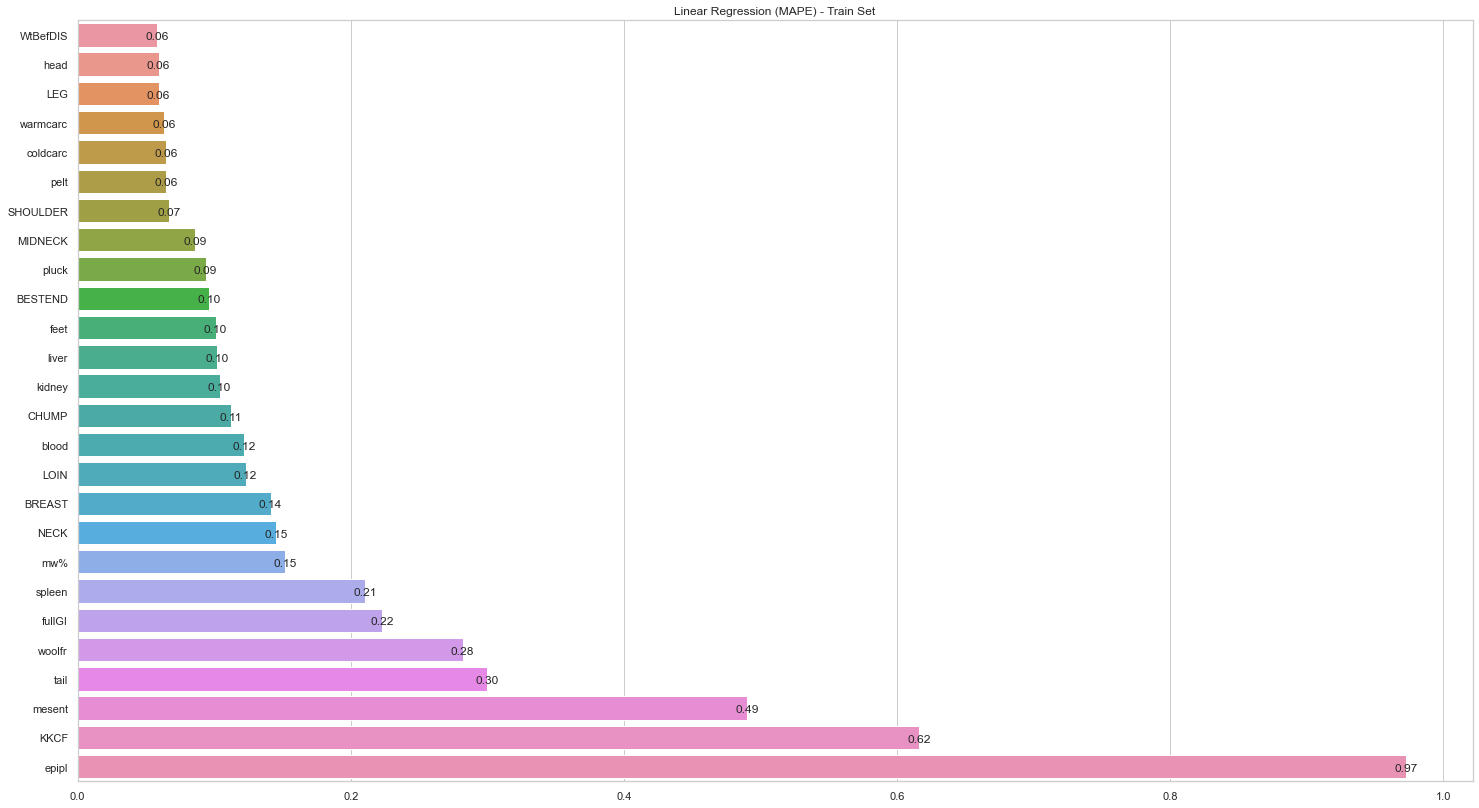

Linear Regression
R2 score: 0.8271968148229816
MAE: 191.4449261925556
RMSE: 255.20611018065662
MAPE: 0.16306401575807733



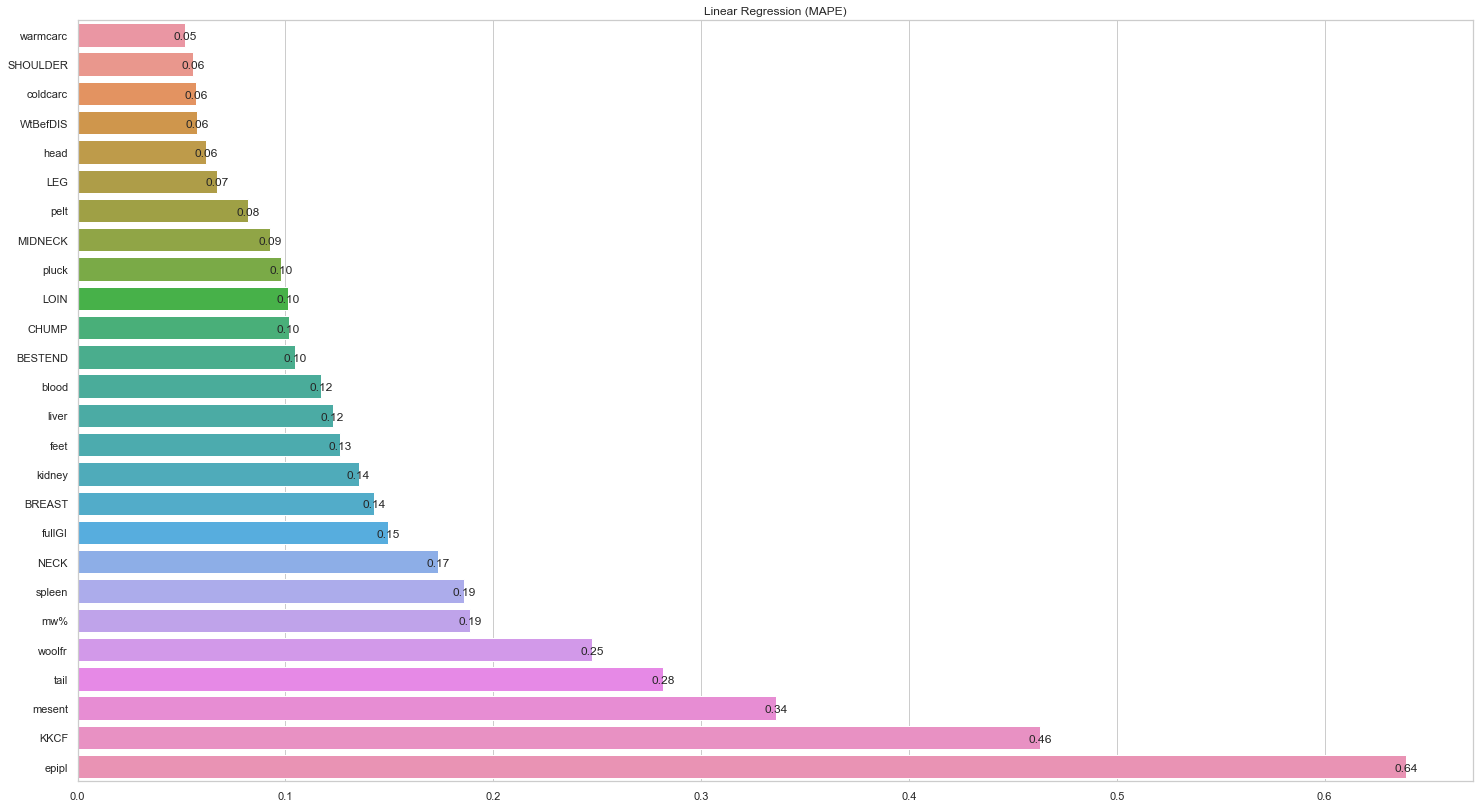

Decision Tree Regressor (train set)
R2 score: 0.9446234891545077
MAE: 126.8214843404591
RMSE: 171.45198964525537
MAPE: 0.11281318830201455



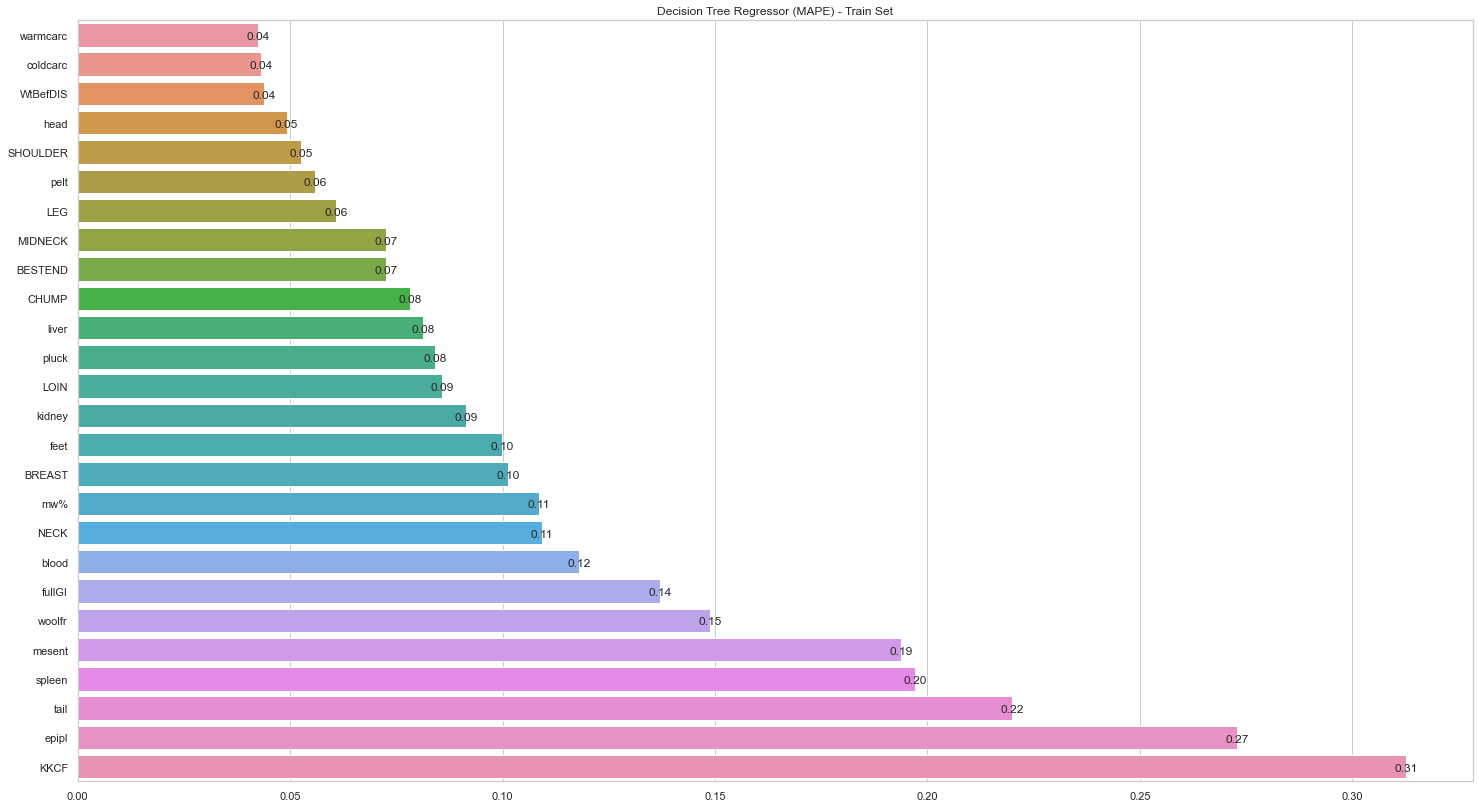

Decision Tree Regressor
R2 score: 0.8459111552969275
MAE: 187.8854402031792
RMSE: 254.26017811567863
MAPE: 0.14250076973436696



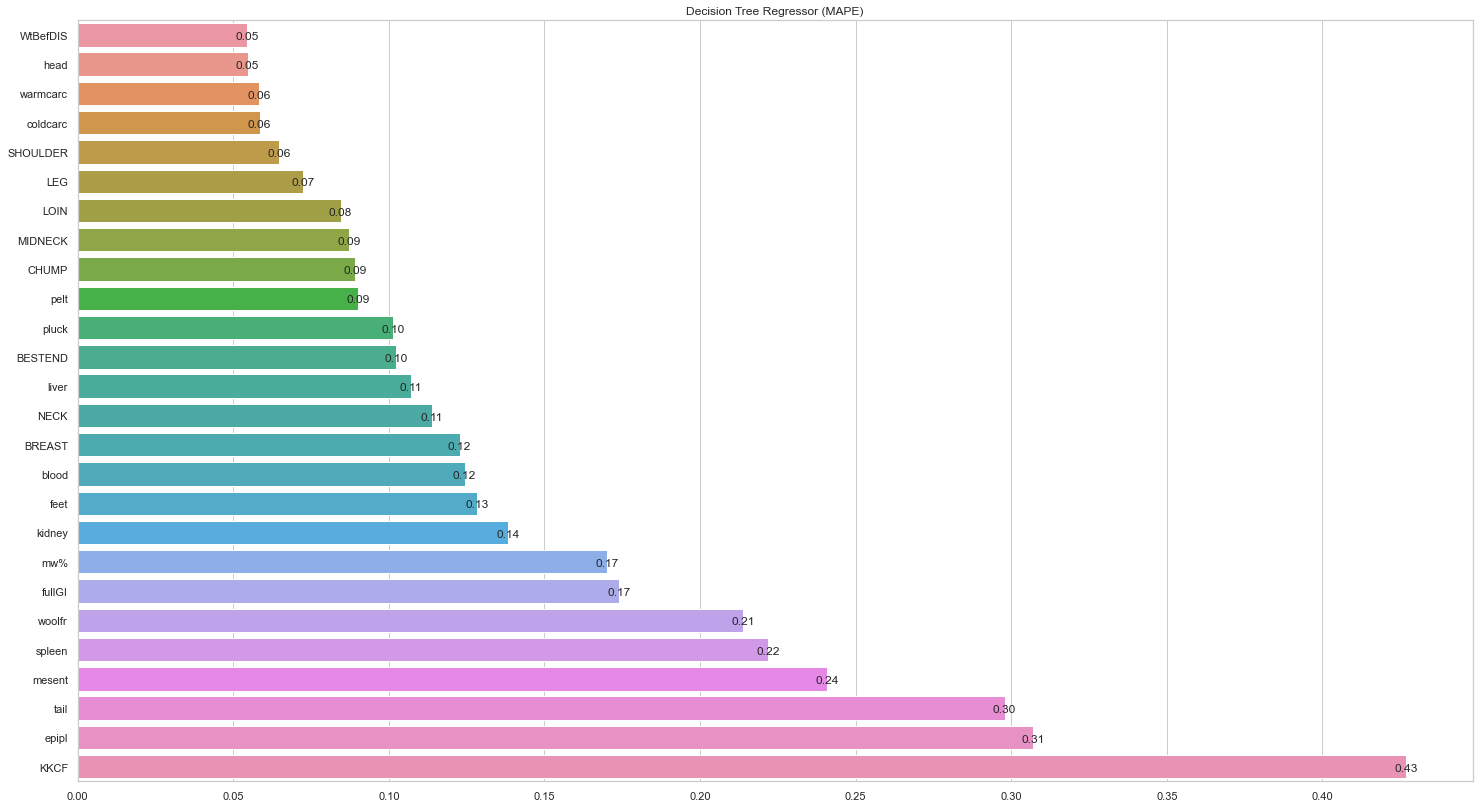

Random Forest Regressor (train set)
R2 score: 0.9503464586309887
MAE: 114.44700462460494
RMSE: 157.03783771322887
MAPE: 0.10637349128515595



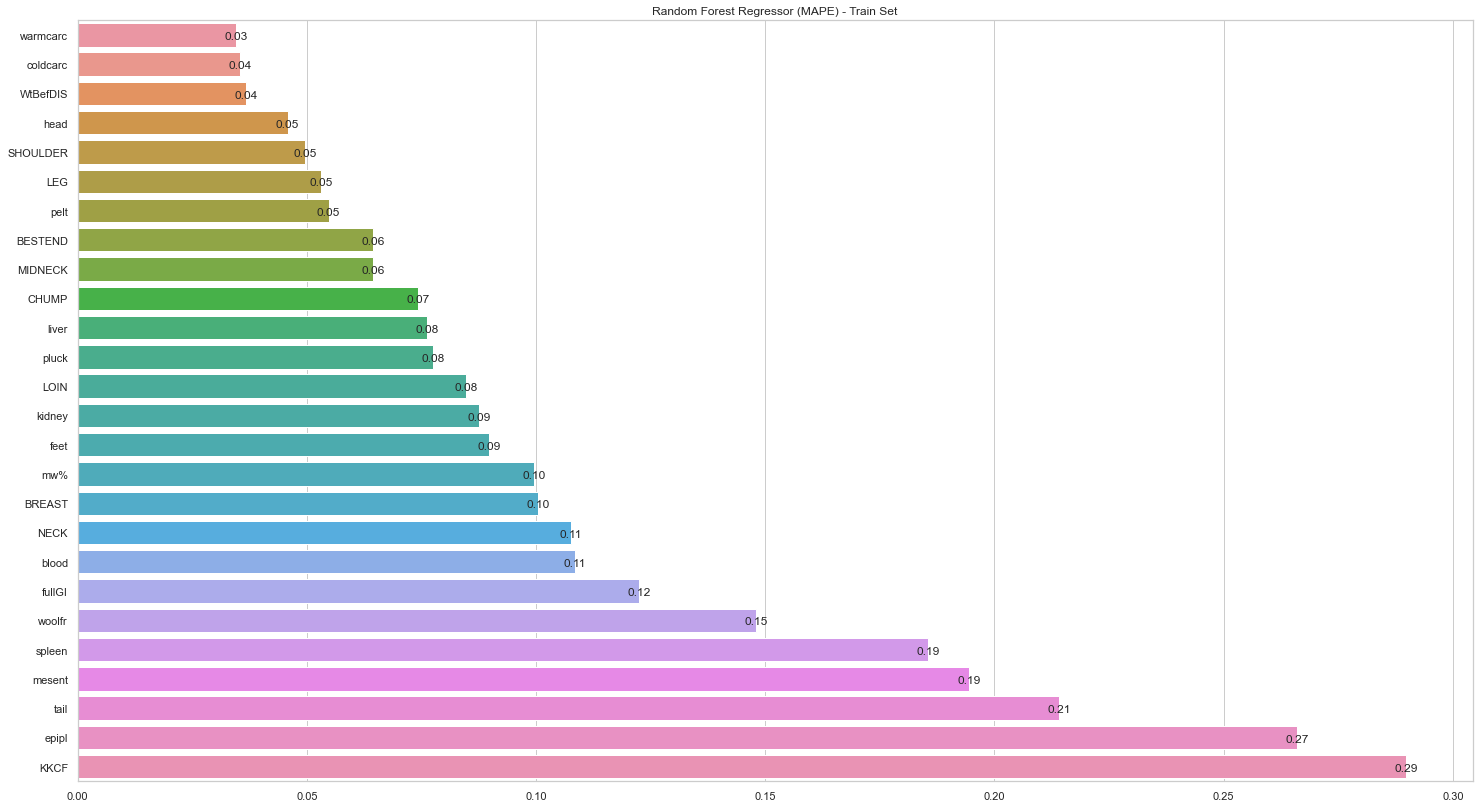

Random Forest Regressor
R2 score: 0.8508996434767149
MAE: 184.76282924075255
RMSE: 248.01784117457055
MAPE: 0.13485538781630138



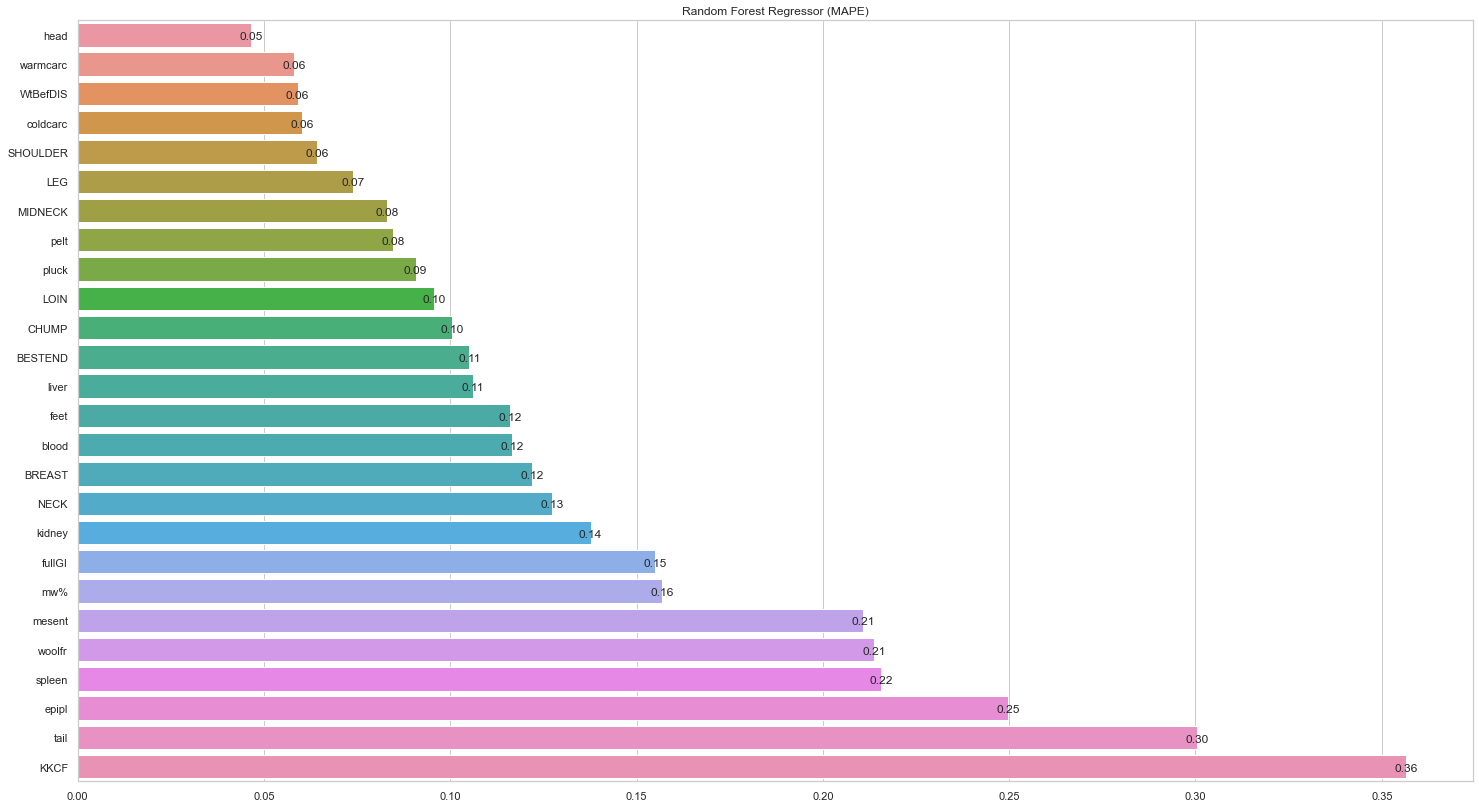

Ridge Regressor (multioutput) (train set)
R2 score: 0.9022488422933476
MAE: 181.46117884251805
RMSE: 232.2374470636602
MAPE: 0.1888679608179105



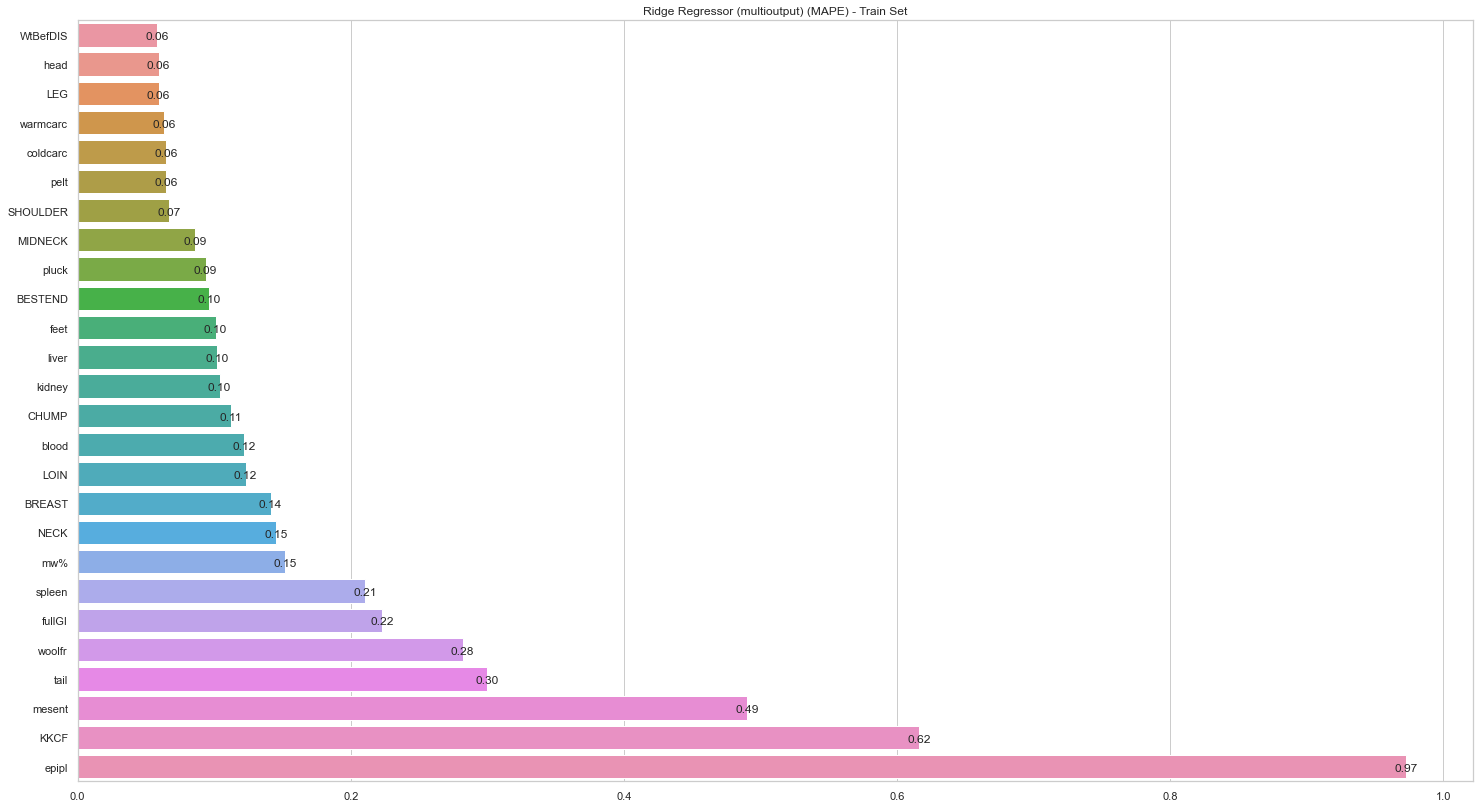

Ridge Regressor (multioutput)
R2 score: 0.827196814821514
MAE: 191.44492618533053
RMSE: 255.20611017862433
MAPE: 0.1630640157557726



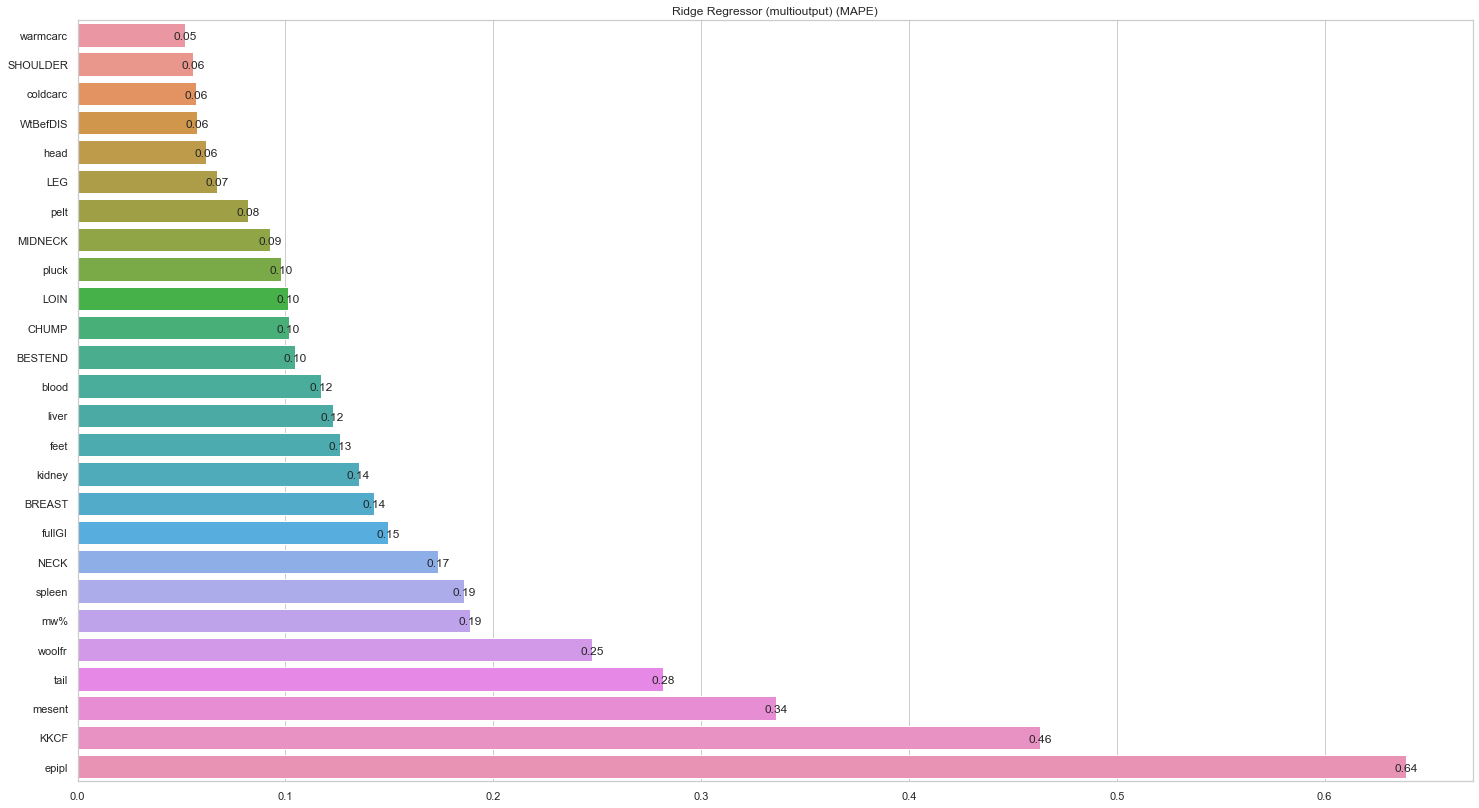

c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning

Linear SVR (multioutput) (train set)
R2 score: 0.5818855456802223
MAE: 348.03166817048776
RMSE: 474.79884905431635
MAPE: 0.3598946401753207



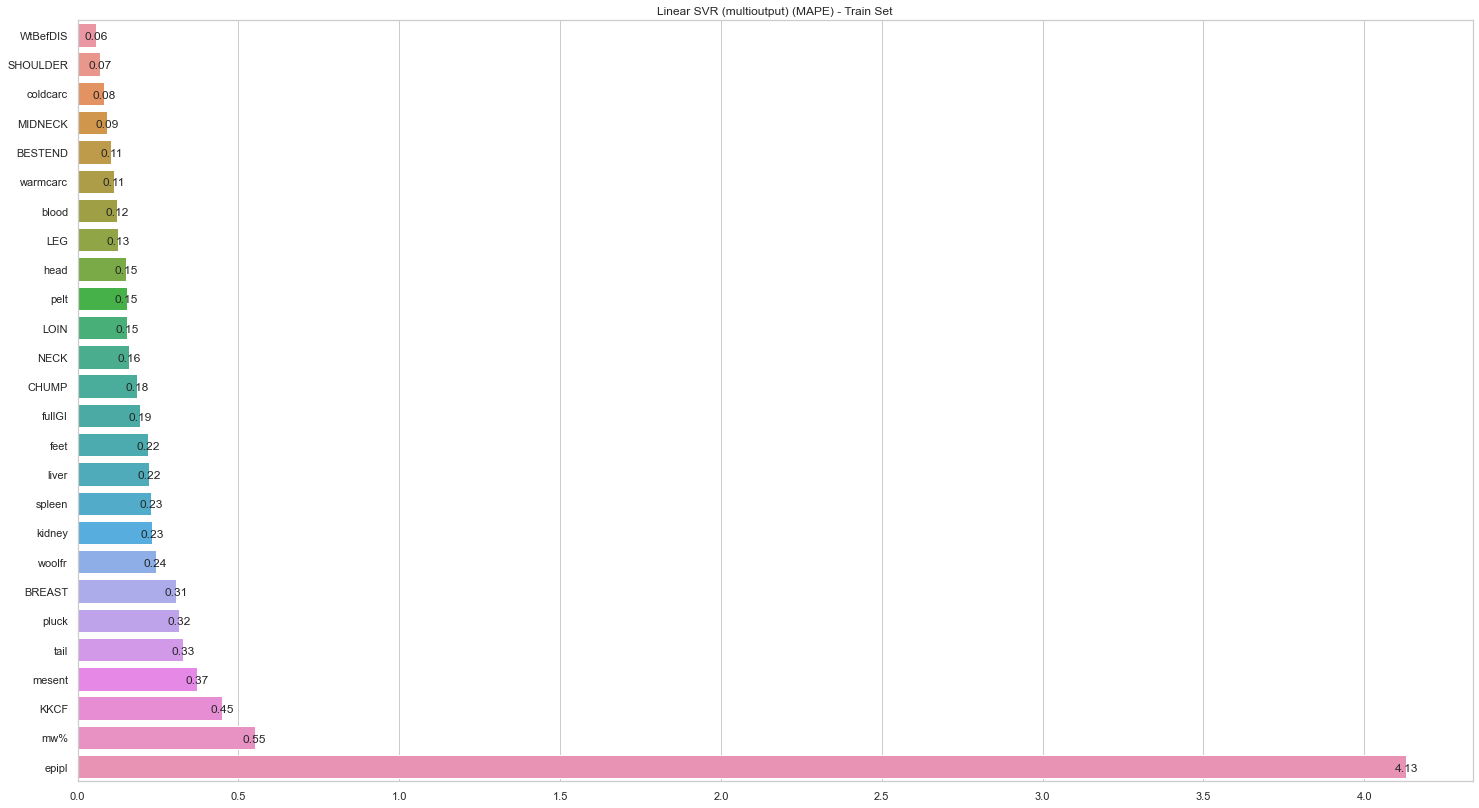

Linear SVR (multioutput)
R2 score: 0.42075719346426116
MAE: 330.5529135883541
RMSE: 435.58448599347327
MAPE: 0.3329075852175852



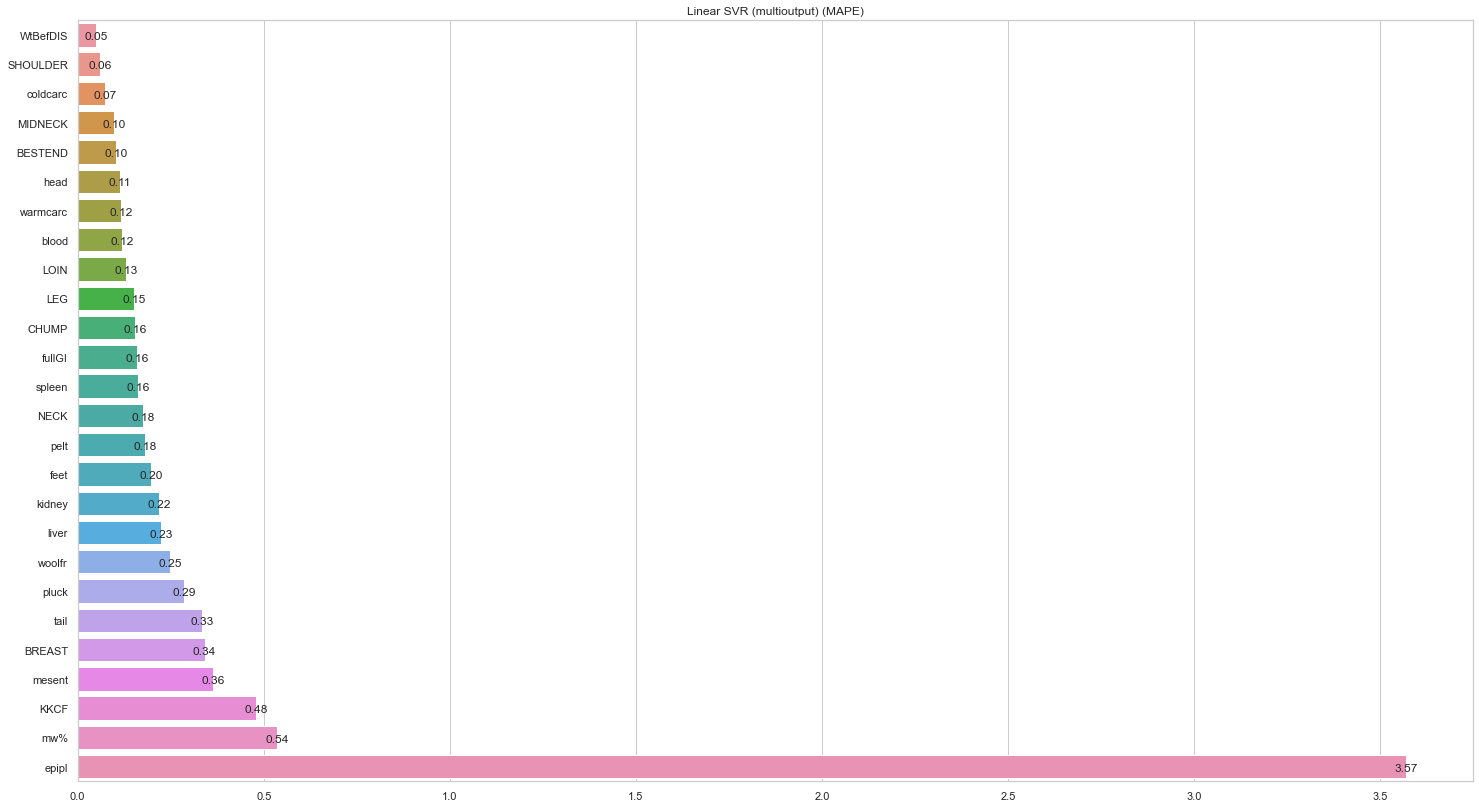

Polynomial SVR (multioutput) (train set)
R2 score: 0.7455066409832592
MAE: 458.14364031747664
RMSE: 575.530363150728
MAPE: 0.2631744586309329



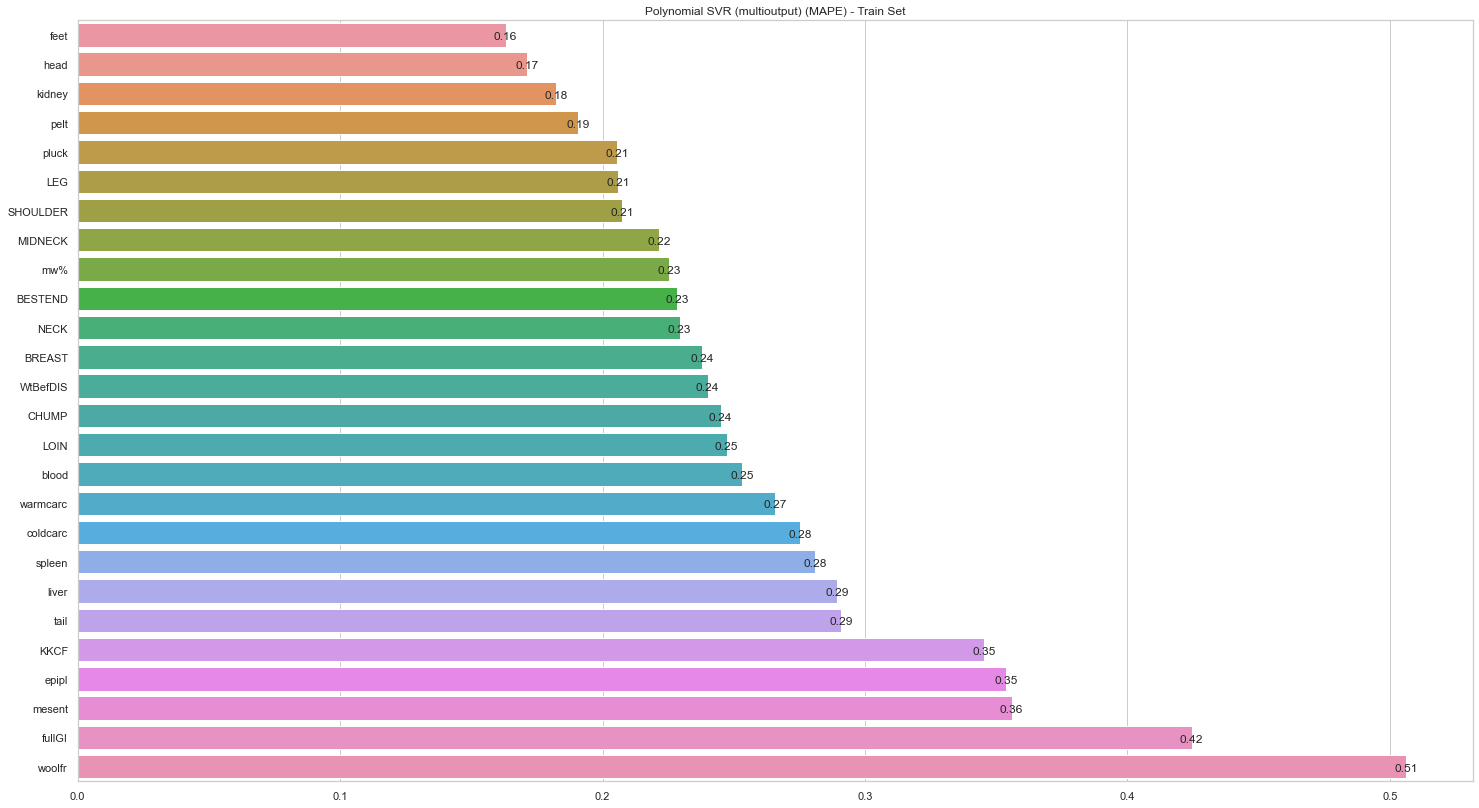

Polynomial SVR (multioutput)
R2 score: 0.586046310144888
MAE: 435.21286696475295
RMSE: 531.1482918101988
MAPE: 0.22662166394757113



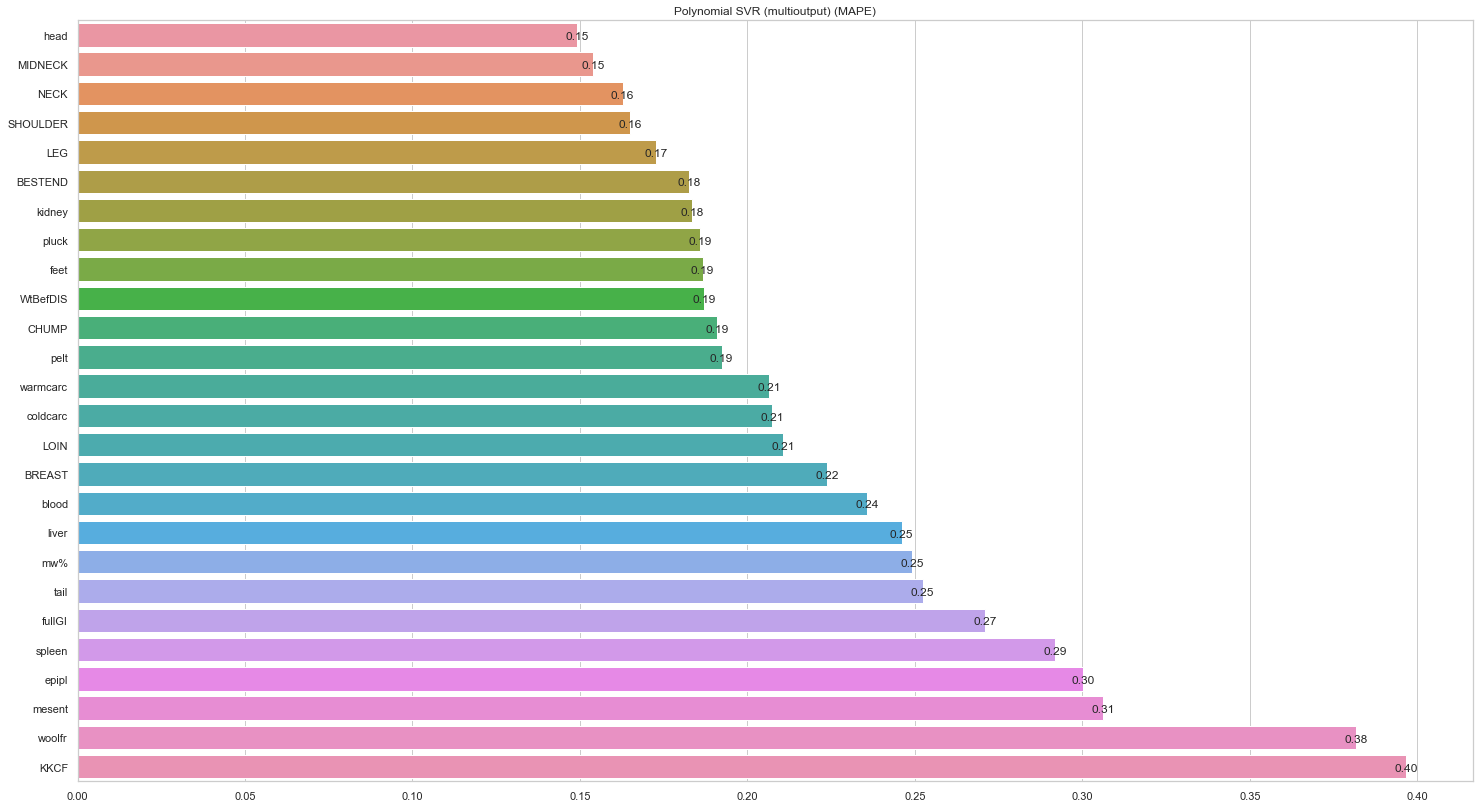

XGBoost (multioutput) (train set)
R2 score: 0.9800178231331474
MAE: 67.39460354082979
RMSE: 103.74358190980101
MAPE: 0.07108378730013518



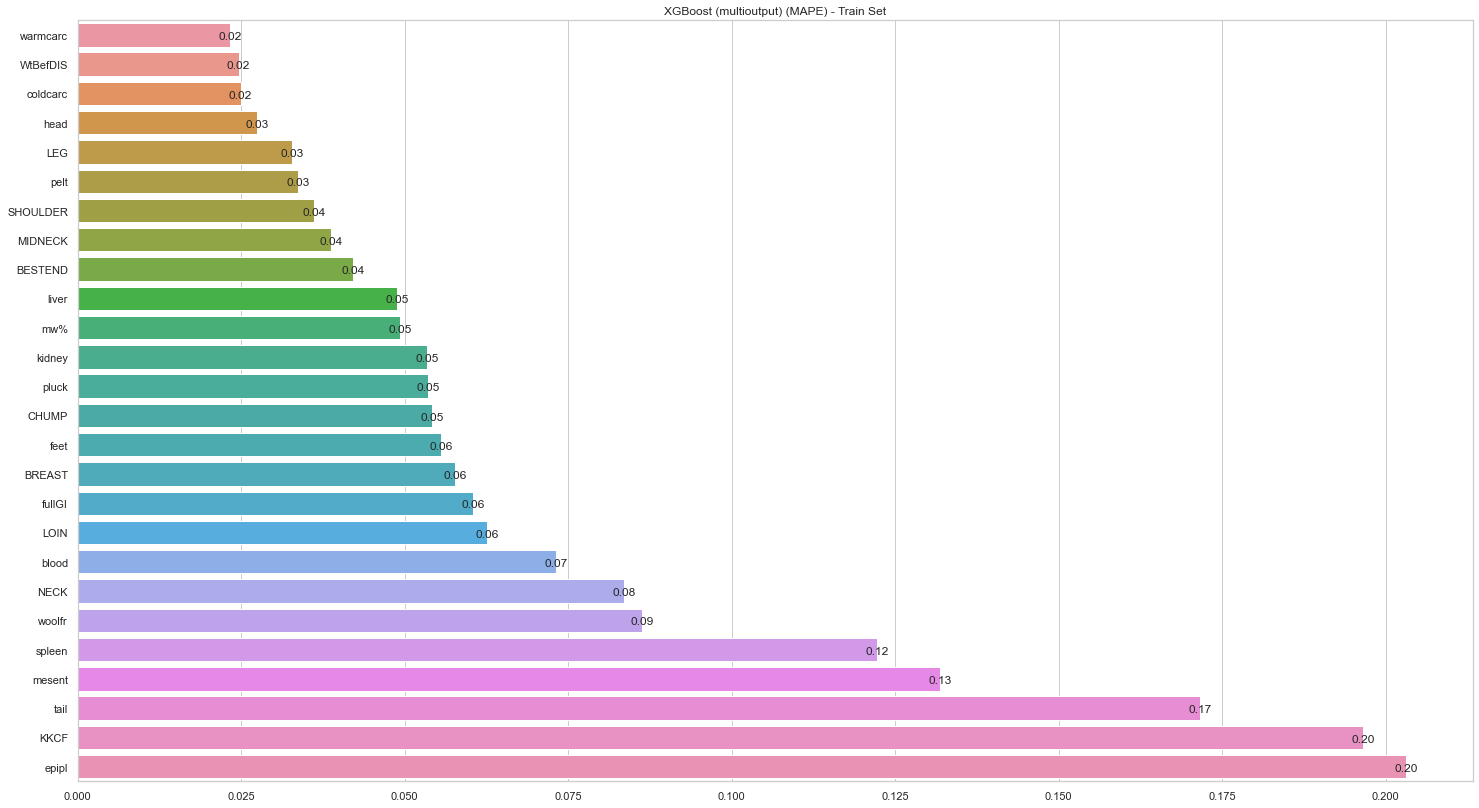

XGBoost (multioutput)
R2 score: 0.846909766004396
MAE: 194.46766435488675
RMSE: 260.4290181868765
MAPE: 0.13676290577462932



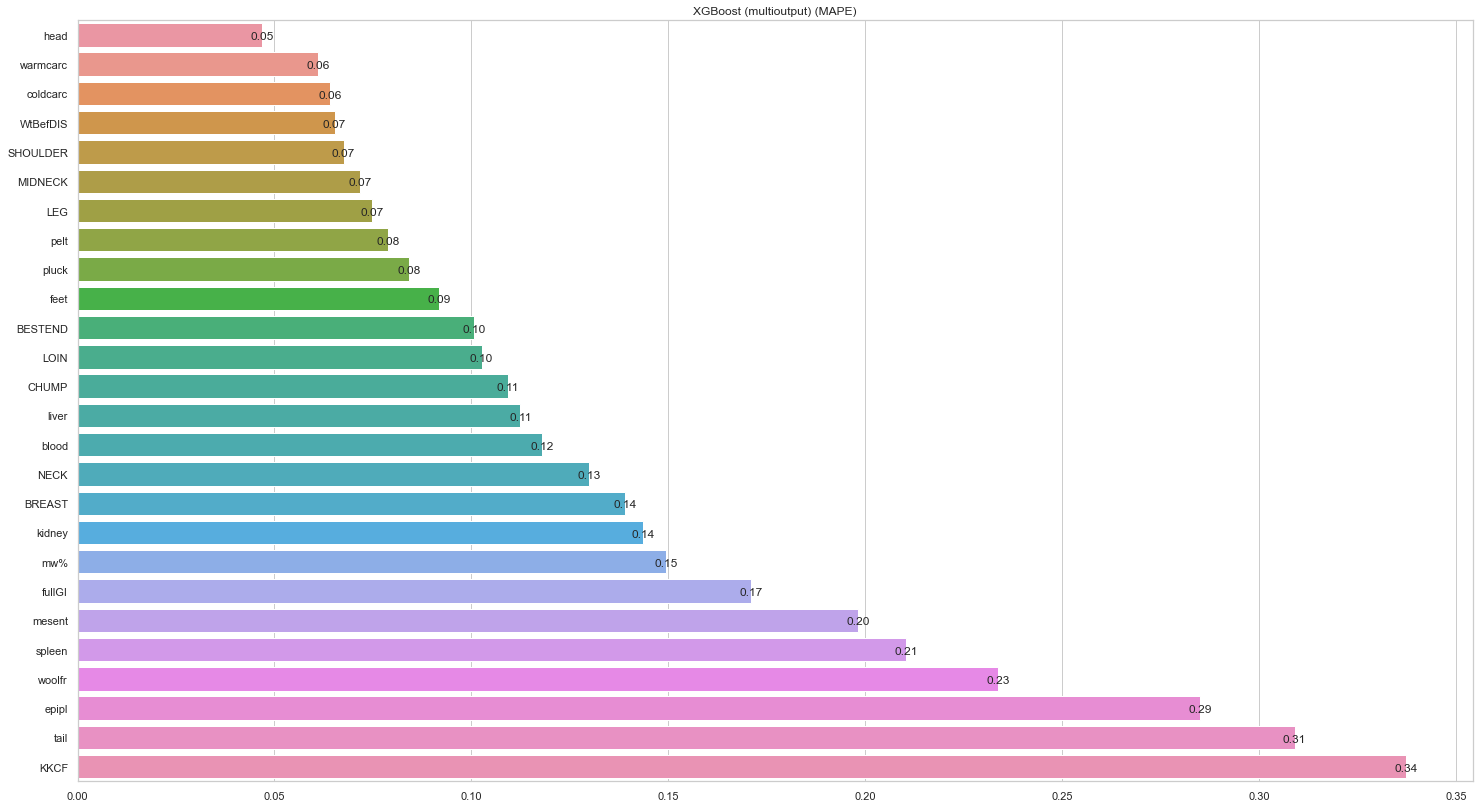

In [4]:
# Separate labels and split to train, test sets
X, y = scale_split_labels(data, scaling=None)
X_train, X_test, y_train, y_test = split_train_test(X, y)

run_regressors(True)

## Std Scaling

Linear Regression
R2 score: 0.8271968148229816
MAE: 0.2351750171075201
RMSE: 0.30865775028575904
MAPE: 1.5516496263437352



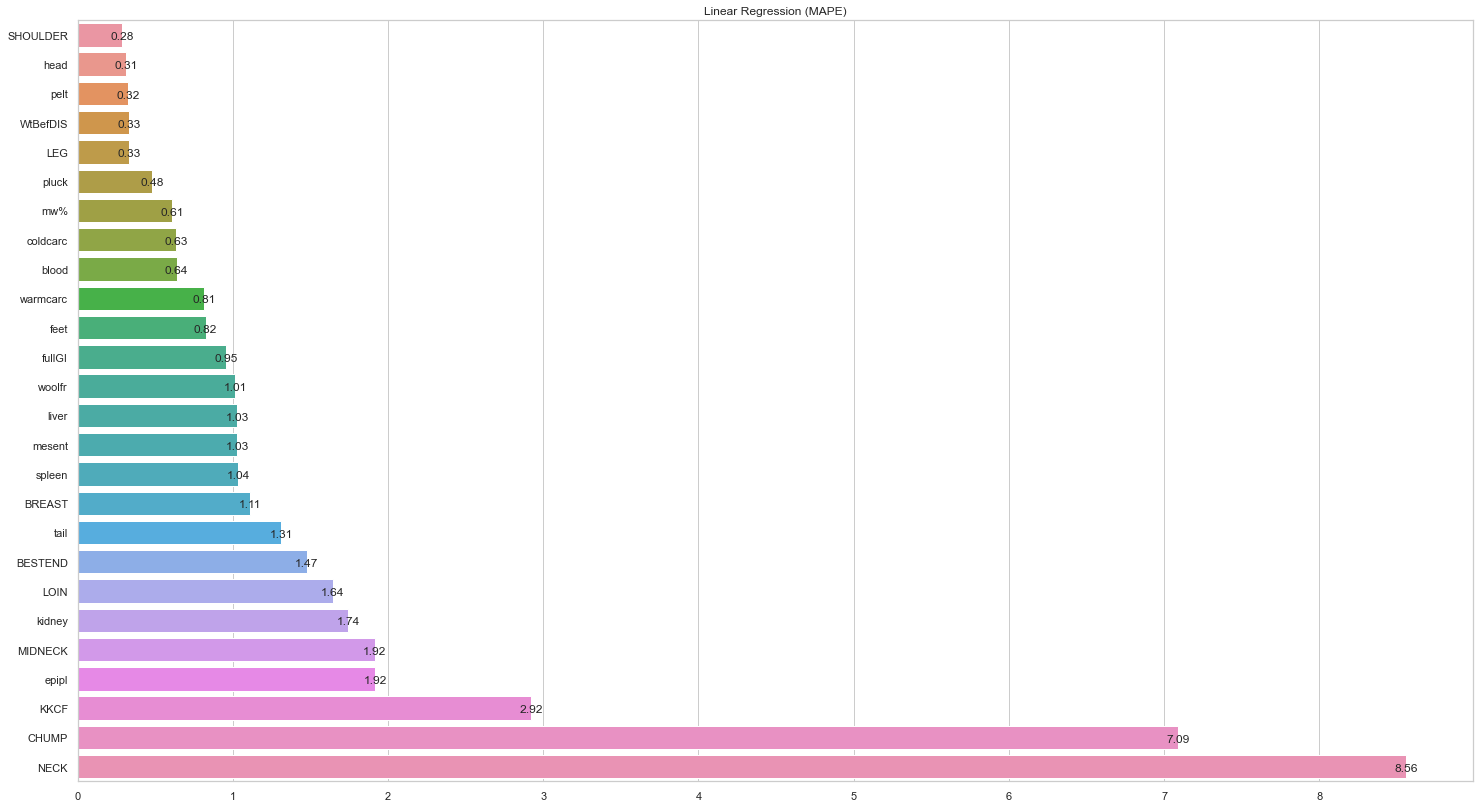

Decision Tree Regressor
R2 score: 0.8358166333521578
MAE: 0.226088066710313
RMSE: 0.2992073399912675
MAPE: 1.2497715731243764



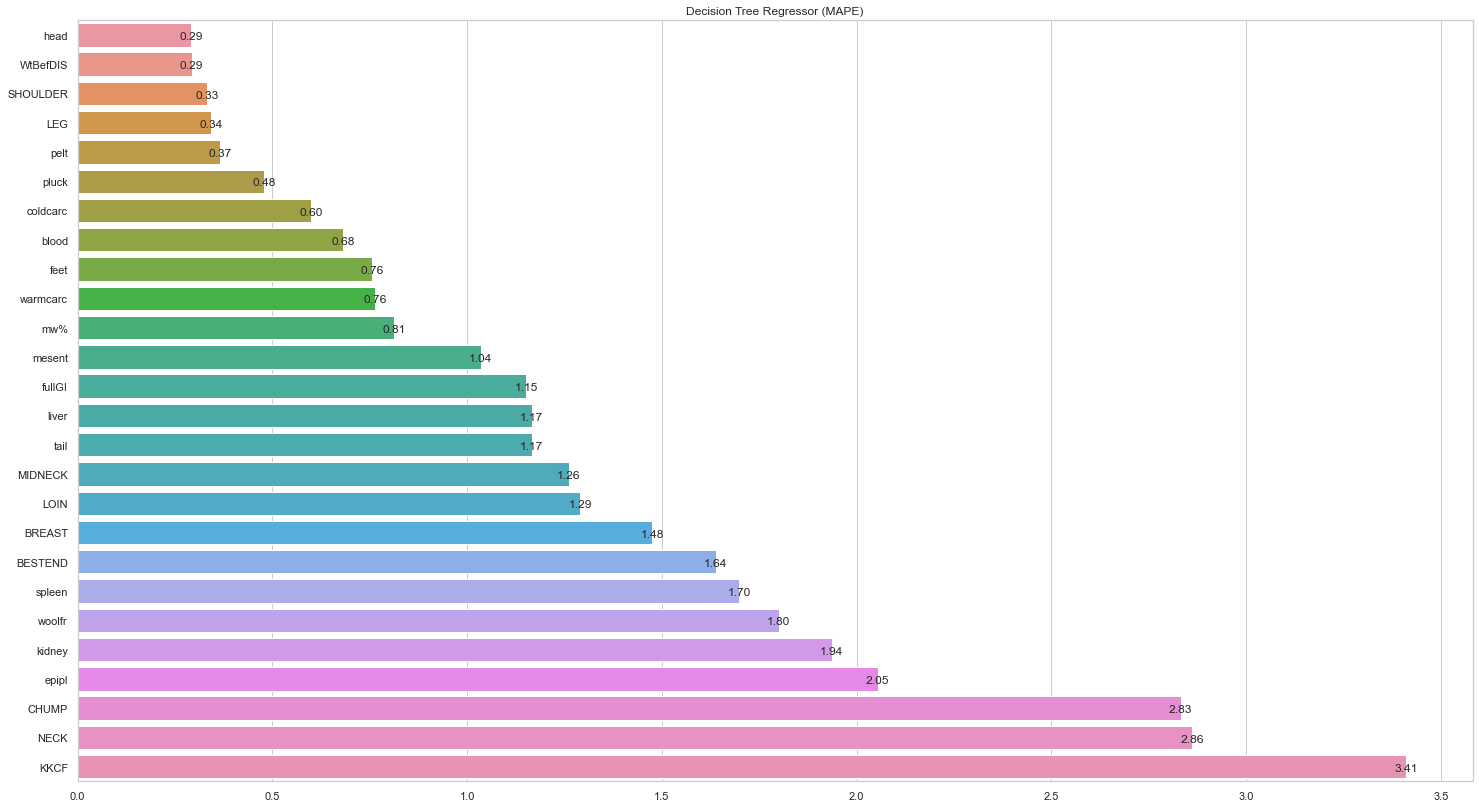

Random Forest Regressor
R2 score: 0.8466916470033324
MAE: 0.2197923655080996
RMSE: 0.2892304537510464
MAPE: 1.2863354986450621



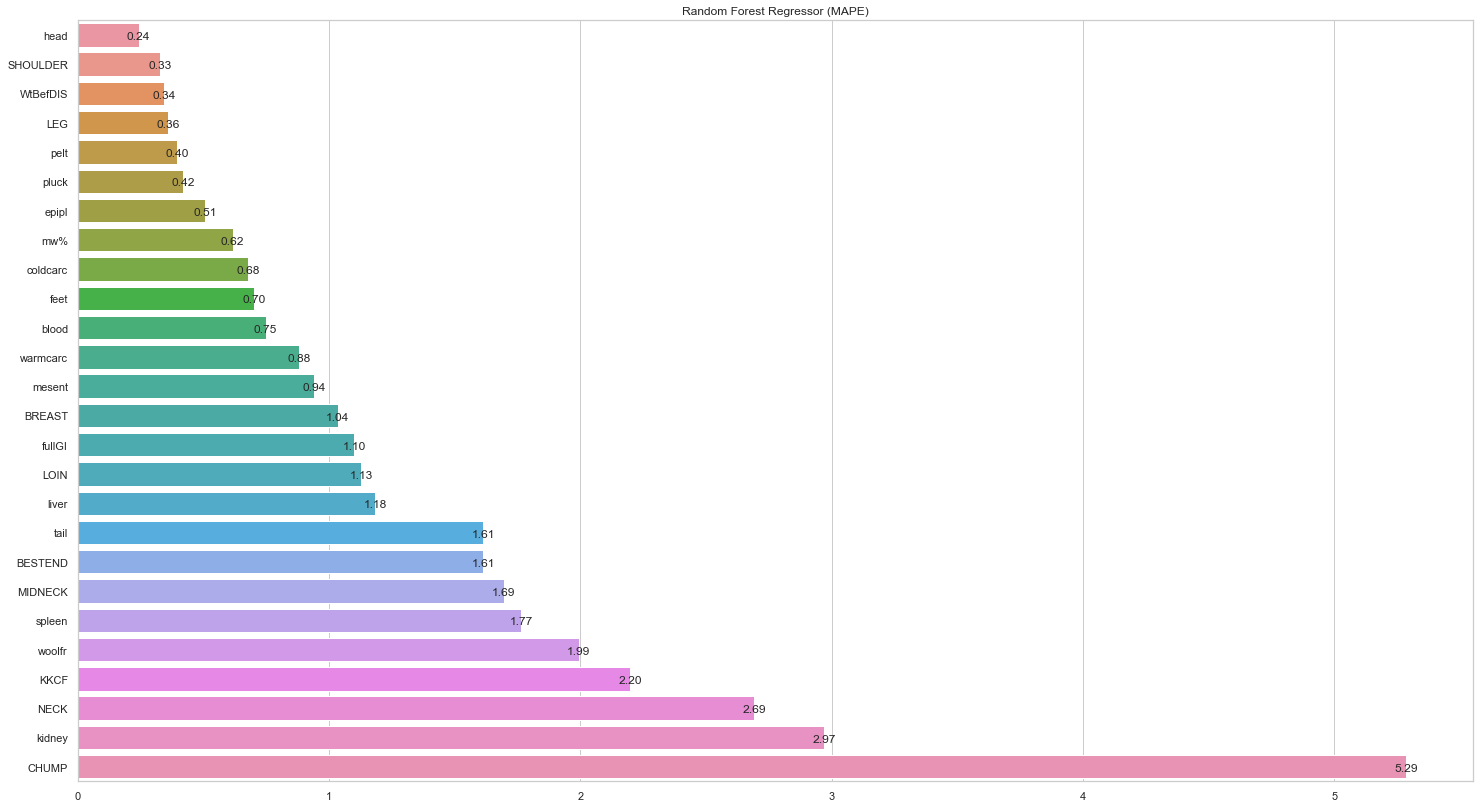

Ridge Regressor (multioutput)
R2 score: 0.8267739107138864
MAE: 0.23517447777049627
RMSE: 0.309061034419352
MAPE: 1.5384803464156762



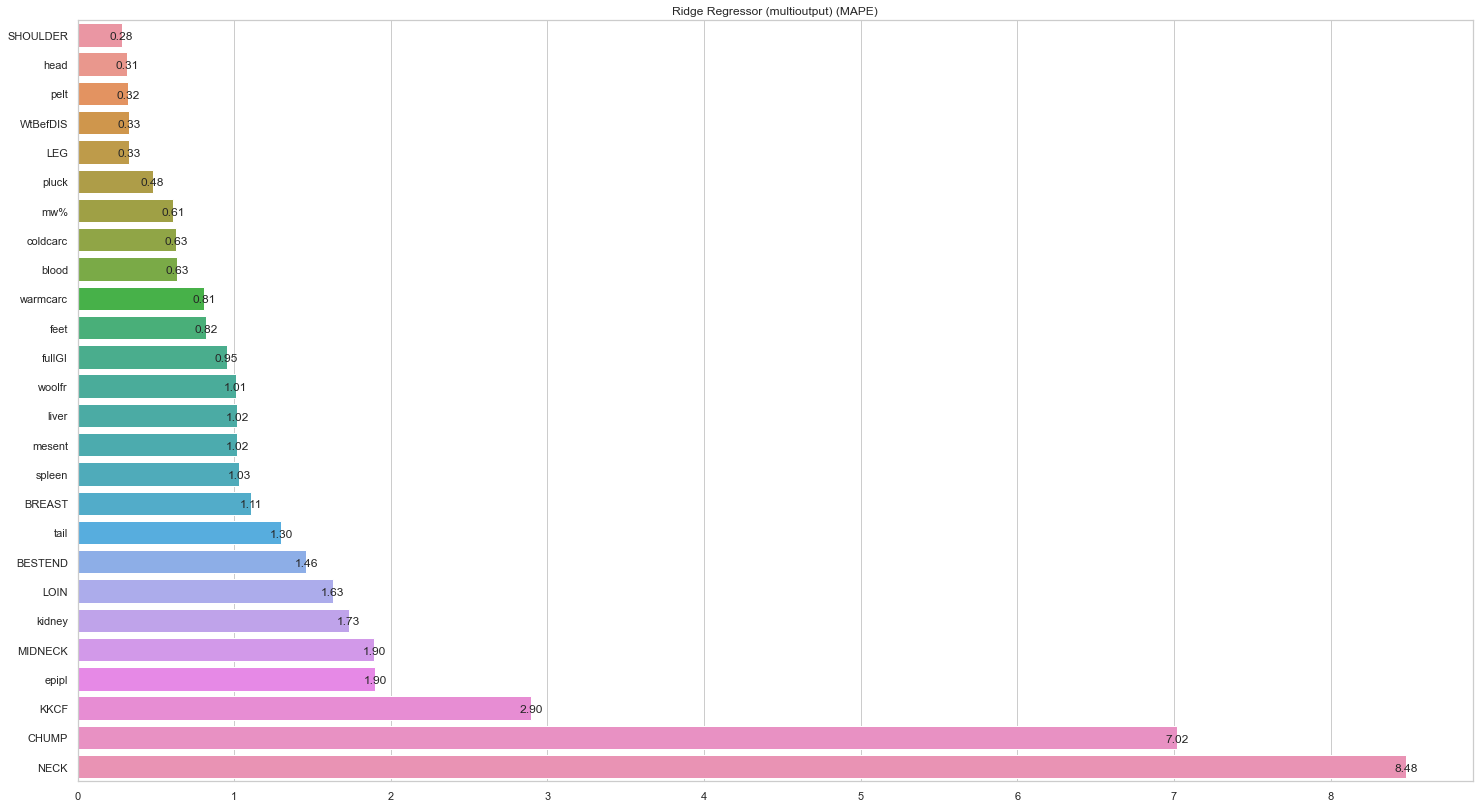

c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning

Linear SVR (multioutput)
R2 score: 0.8170779622670016
MAE: 0.2315917114849643
RMSE: 0.31588162040578954
MAPE: 1.3937878775548744



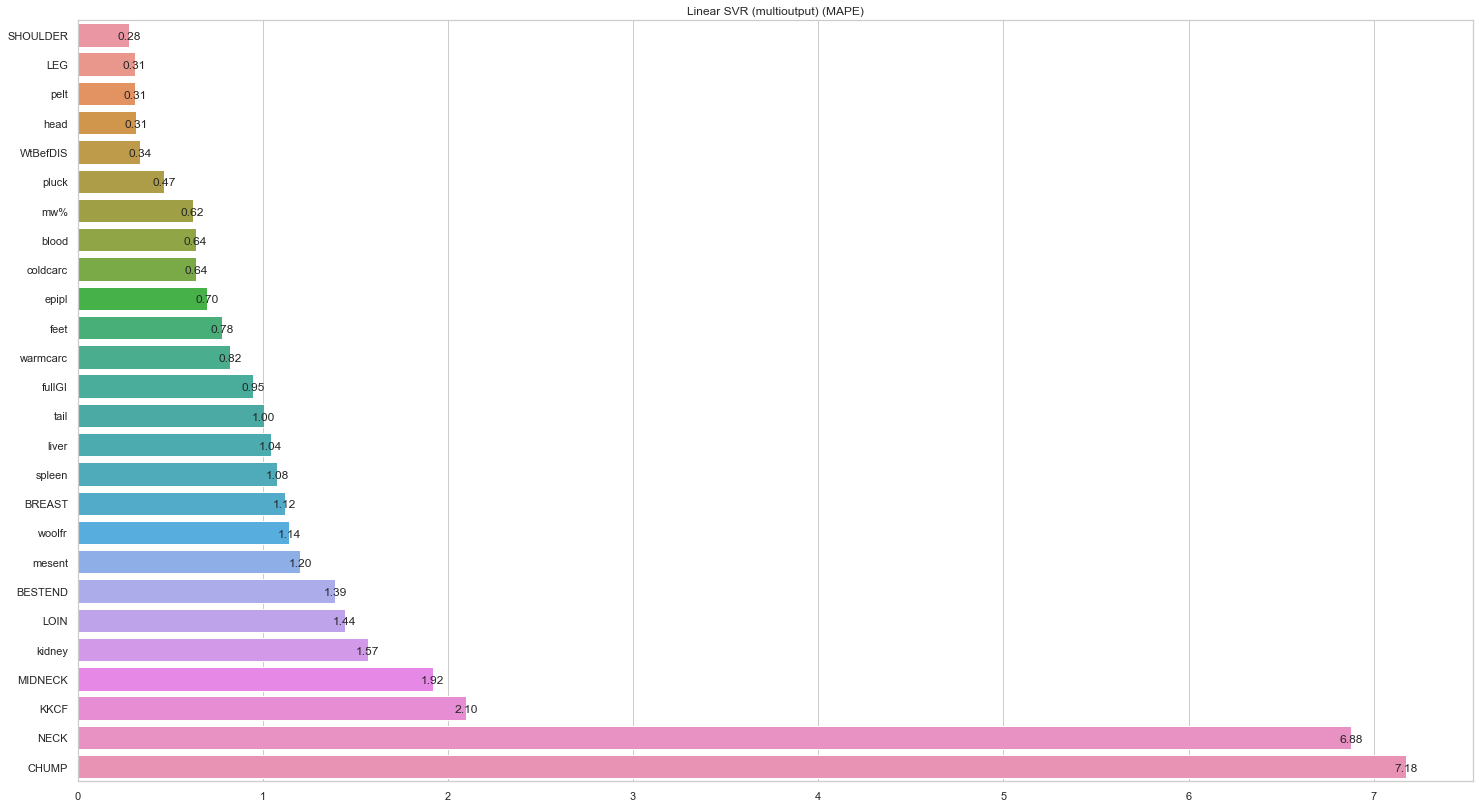

Polynomial SVR (multioutput)
R2 score: 0.18653734965945878
MAE: 0.5315672894954842
RMSE: 0.6944620656713323
MAPE: 2.2849486397370984



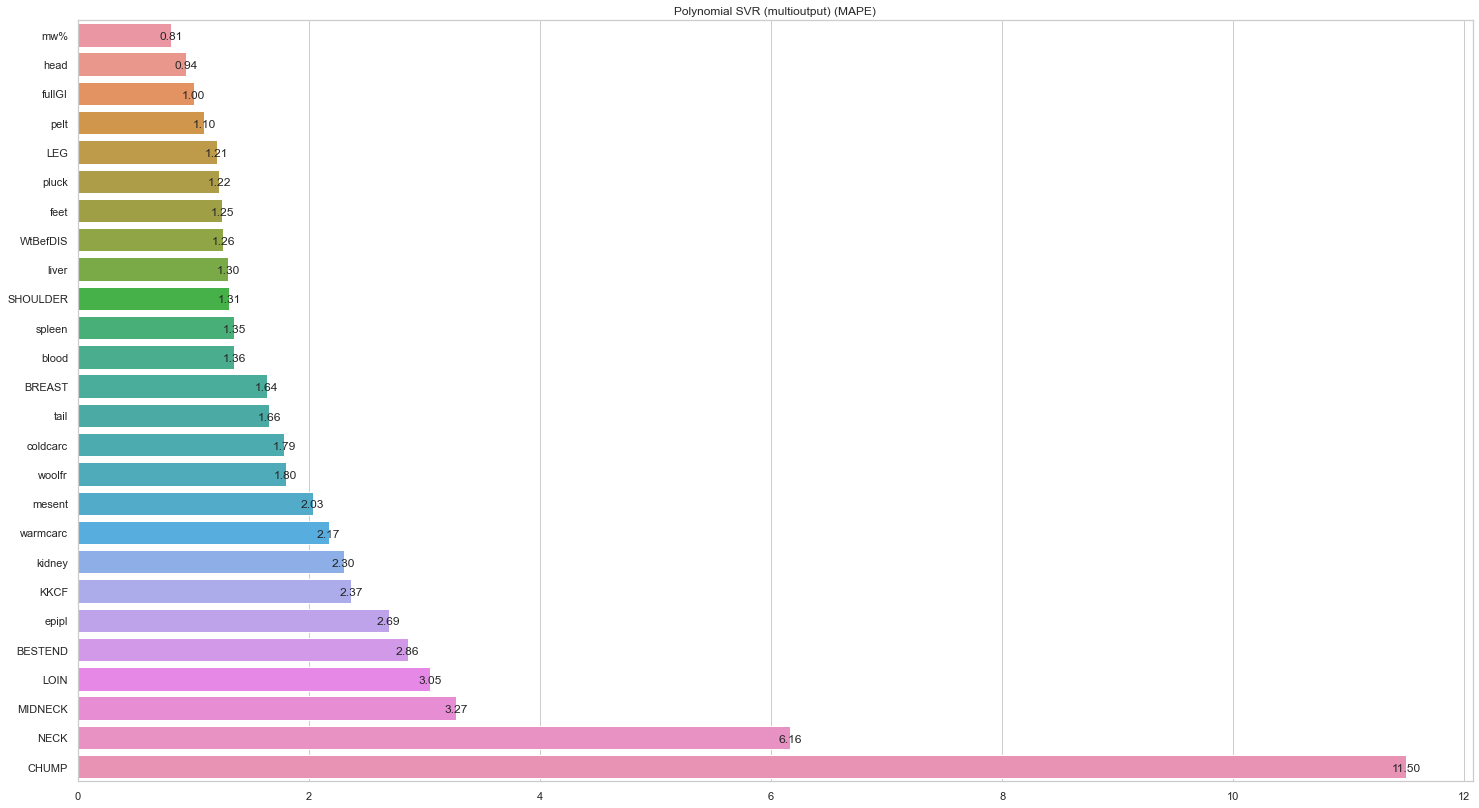

XGBoost (multioutput)
R2 score: 0.8463749630014307
MAE: 0.21816324378393168
RMSE: 0.2891979686968636
MAPE: 1.2710382639119677



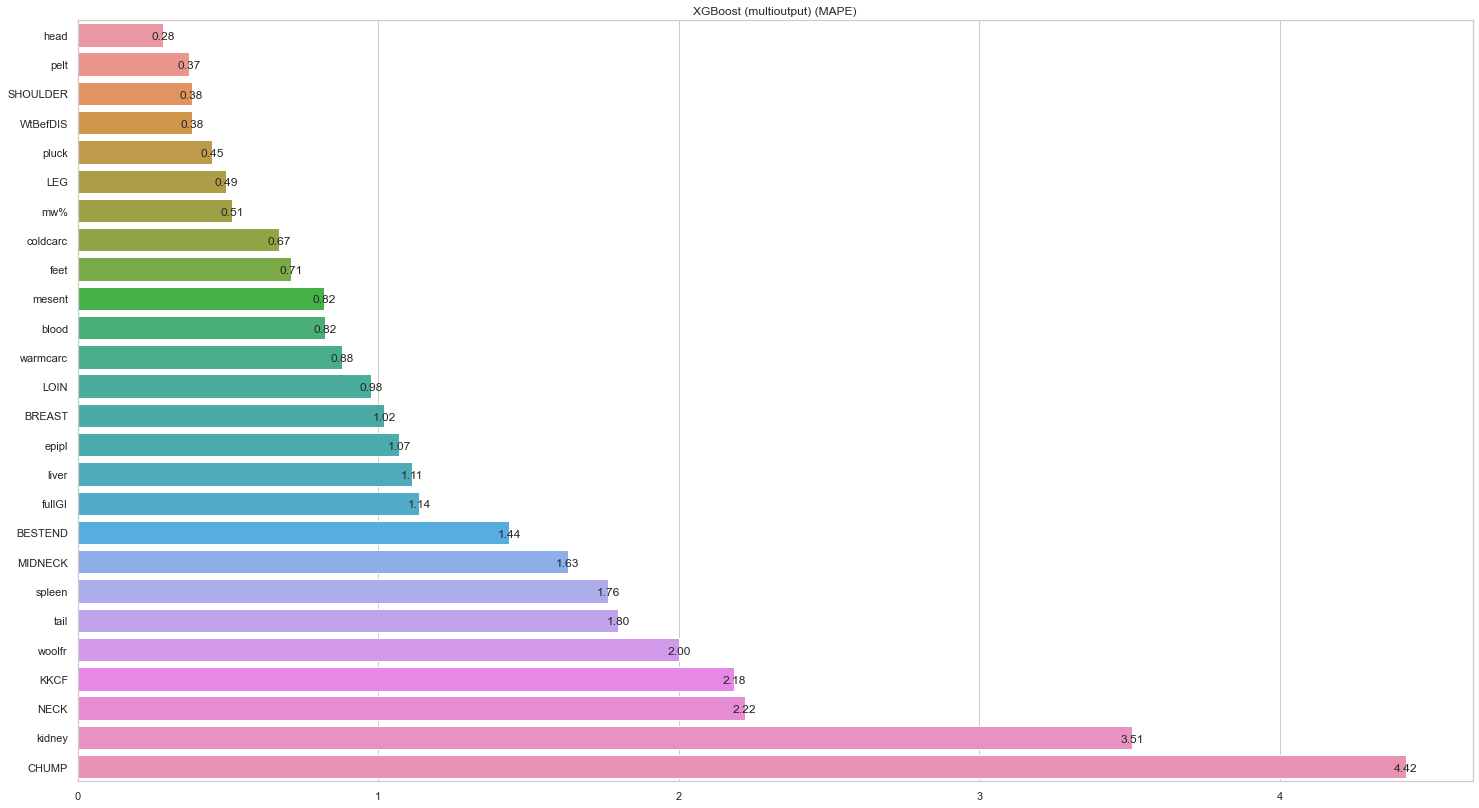

In [5]:
# Separate labels and split to train, test sets
X, y = scale_split_labels(data, scaling='std')
X_train, X_test, y_train, y_test = split_train_test(X, y)

run_regressors()

## Min-Max Scaling

Linear Regression
R2 score: 0.8271968148229815
MAE: 0.0580644781782289
RMSE: 0.07603101744094562
MAPE: 0.04229987277200404



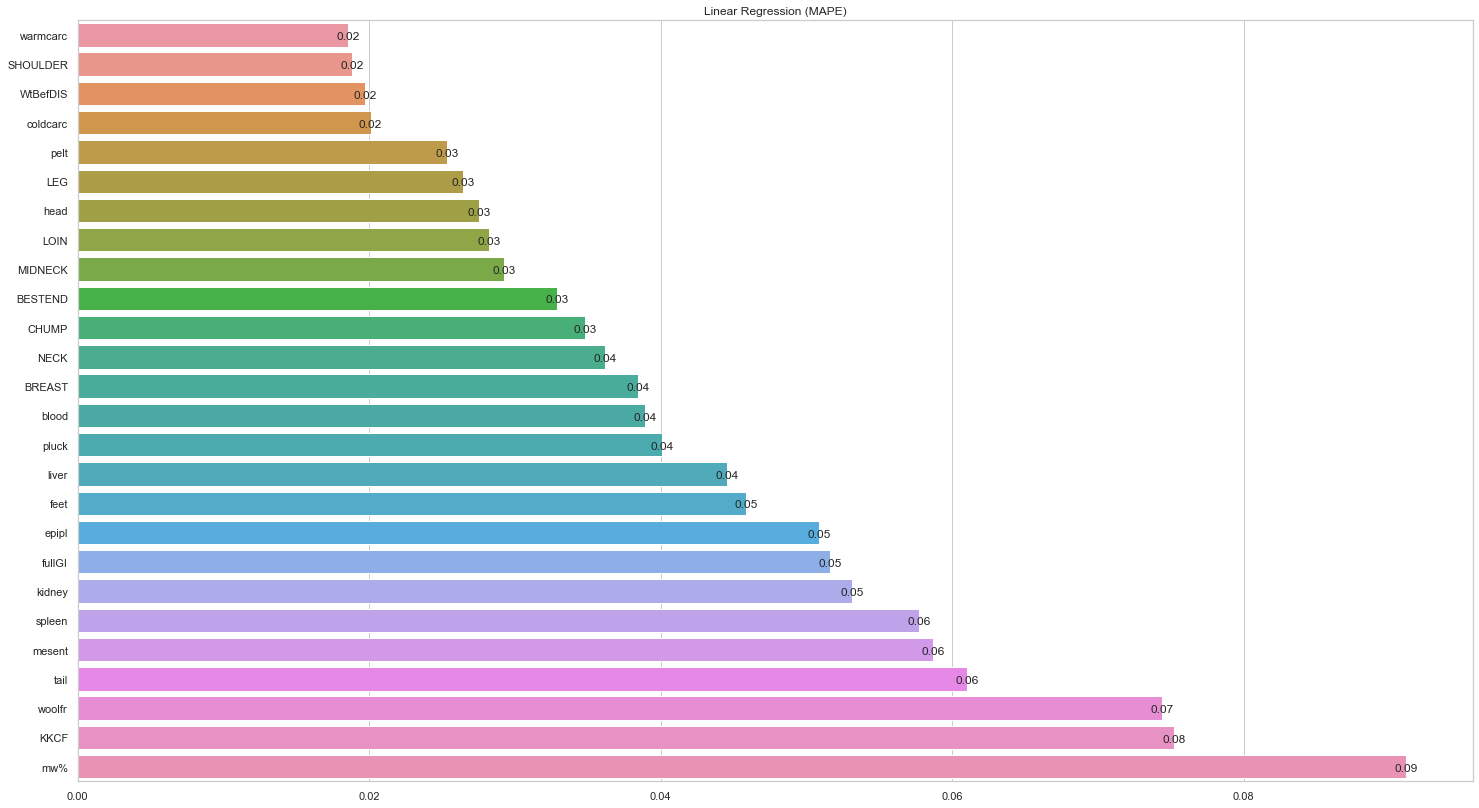

Decision Tree Regressor
R2 score: 0.8272601804561238
MAE: 0.05725298969206143
RMSE: 0.07586842036392541
MAPE: 0.04239701786911841



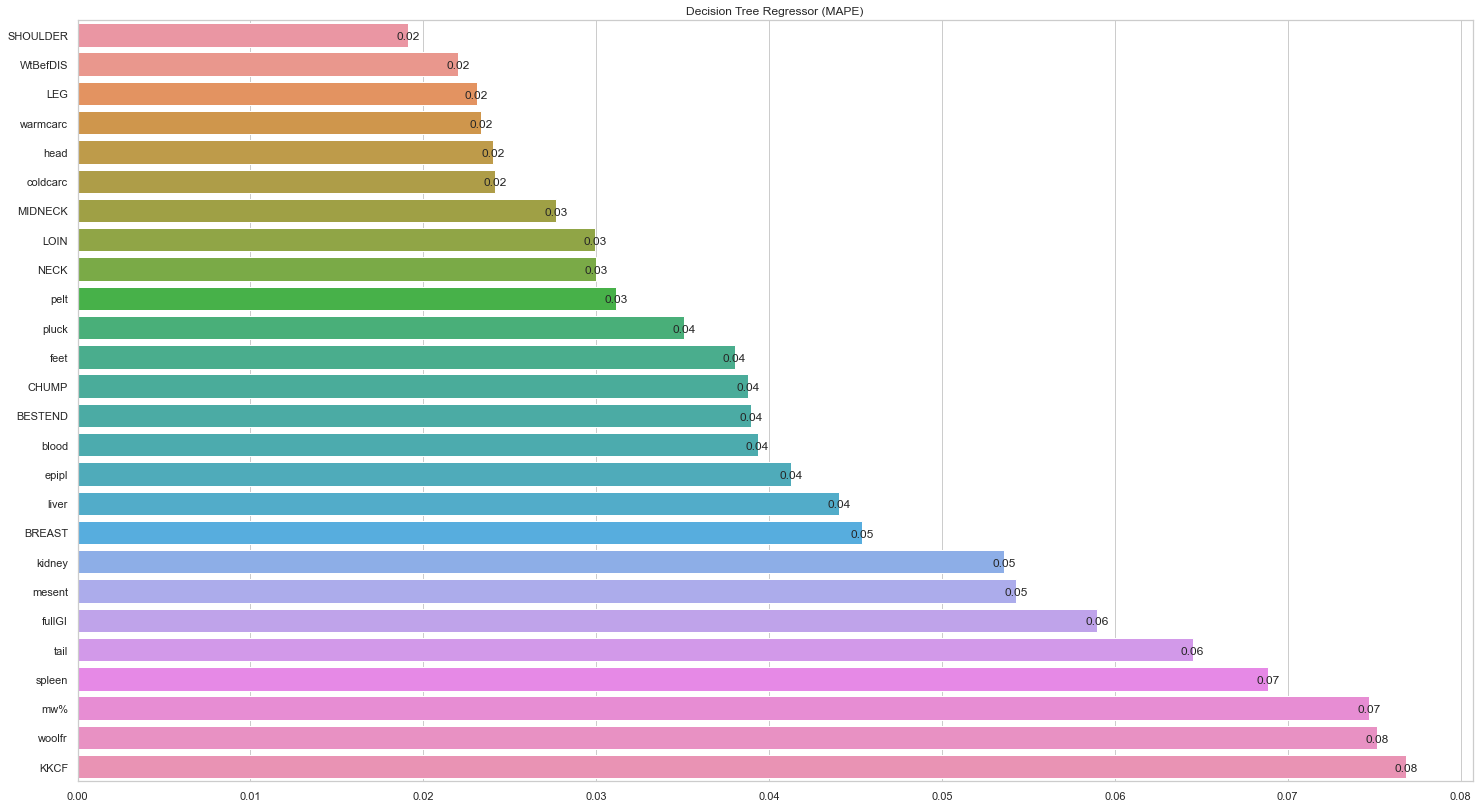

Random Forest Regressor
R2 score: 0.8406132793789247
MAE: 0.054947742077487684
RMSE: 0.07215312095437702
MAPE: 0.04005063727640902



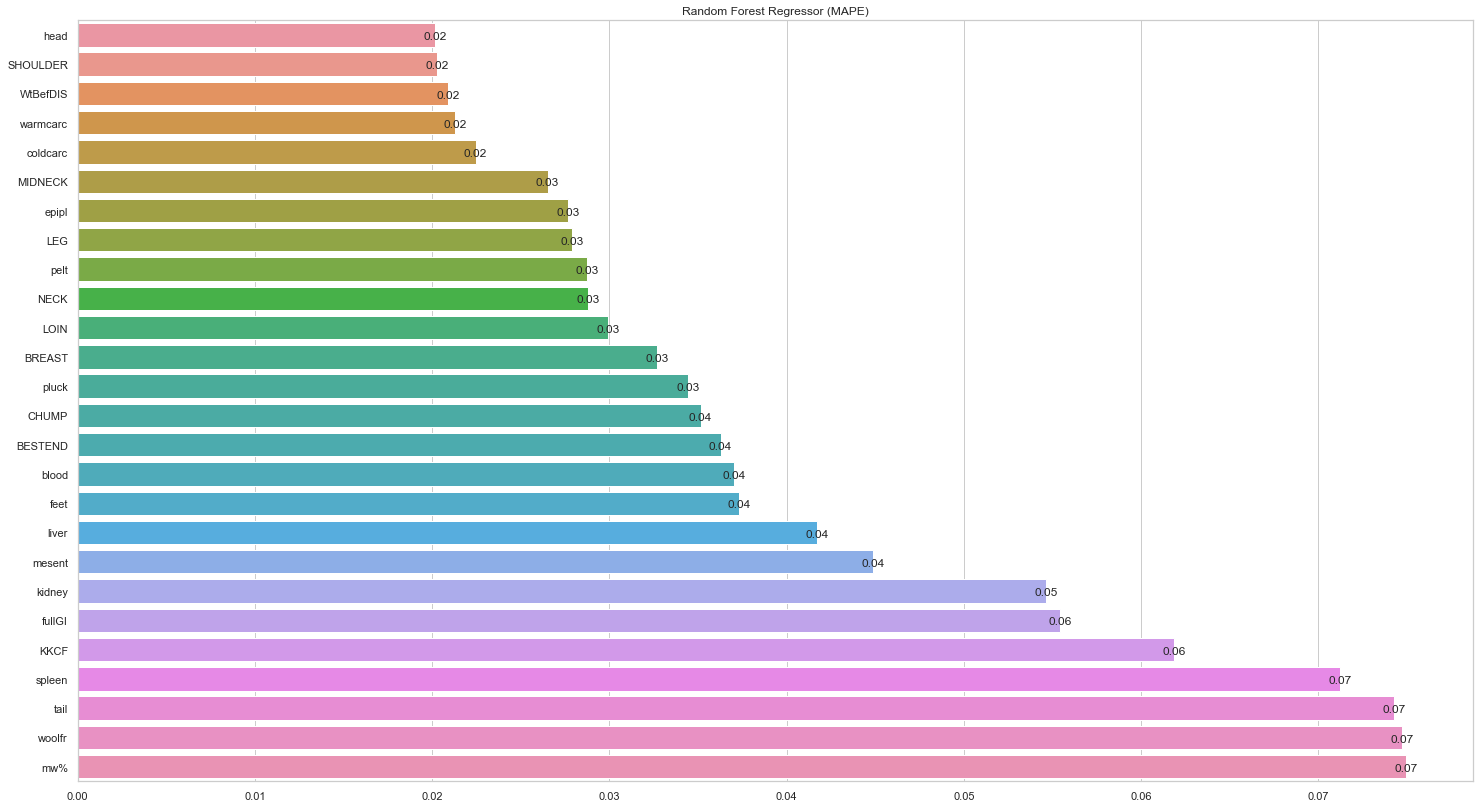

Ridge Regressor (multioutput)
R2 score: 0.8090205338321047
MAE: 0.06133857634716687
RMSE: 0.08076793759042636
MAPE: 0.045010010074752485



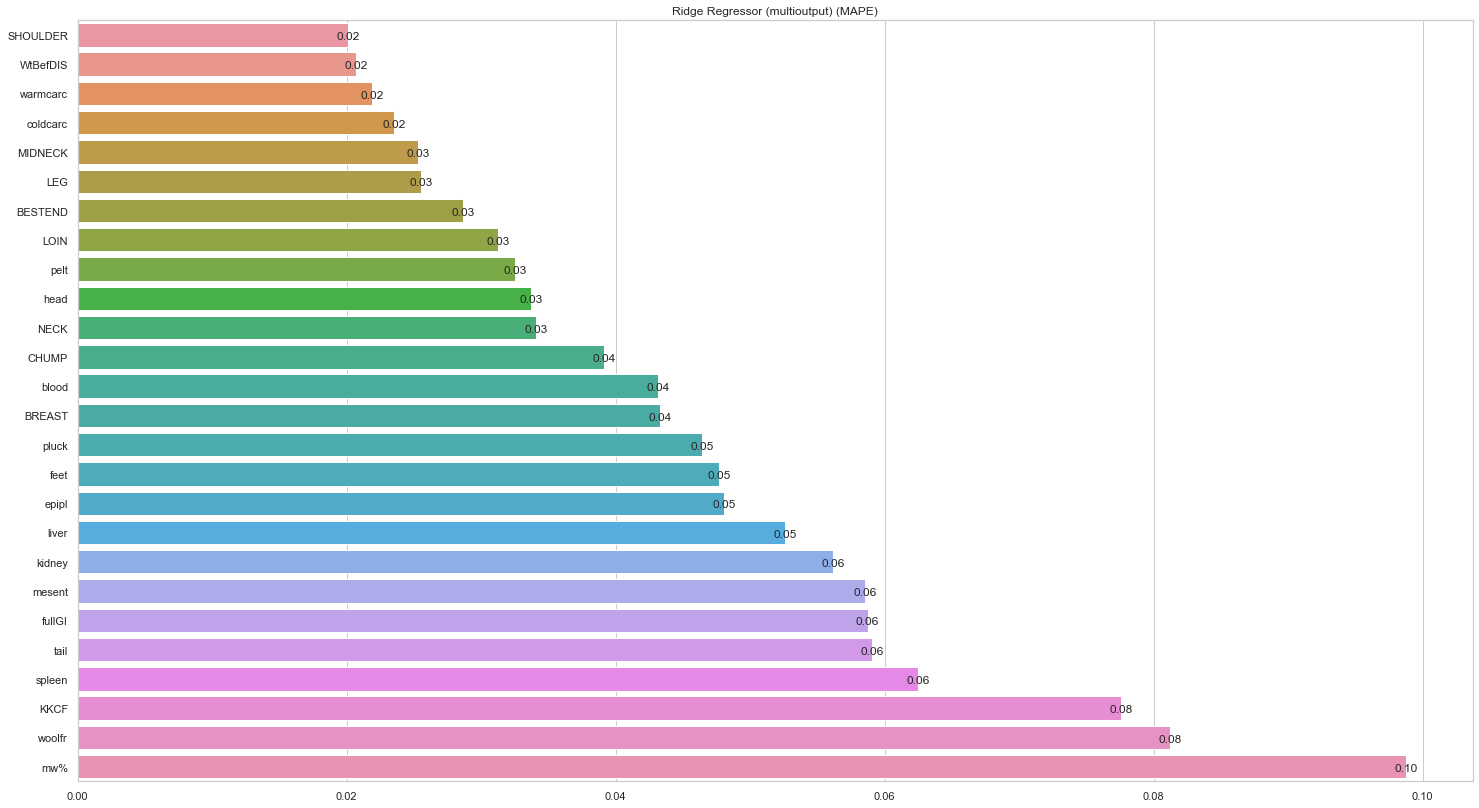

c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\users\tony\desktop\thesis code\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning

Linear SVR (multioutput)
R2 score: 0.8160421283723427
MAE: 0.057558767624307186
RMSE: 0.0781903524745298
MAPE: 0.04131866474070267



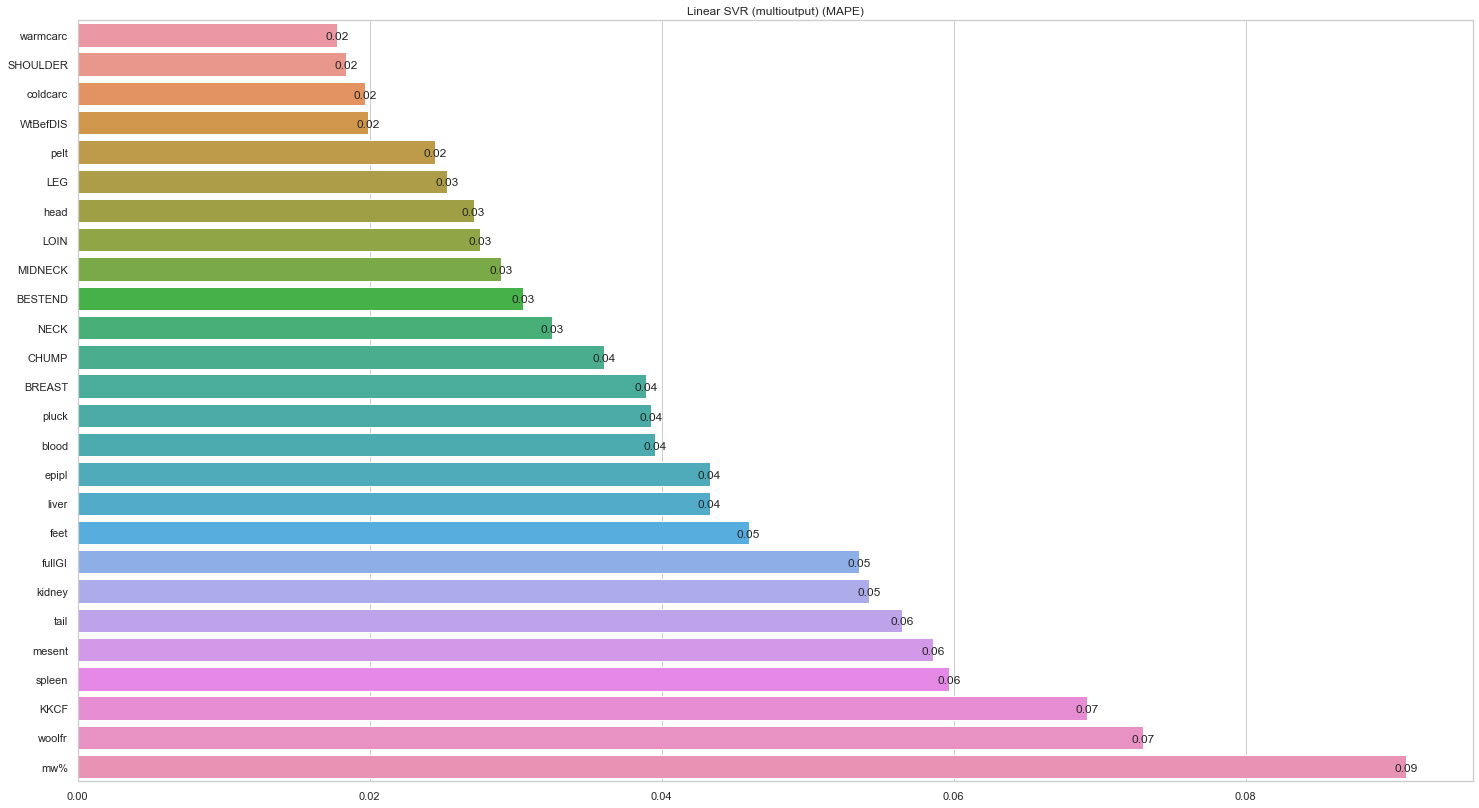

Polynomial SVR (multioutput)
R2 score: 0.7666531399120059
MAE: 0.07037606995570193
RMSE: 0.09113587231002071
MAPE: 0.051609443208875956



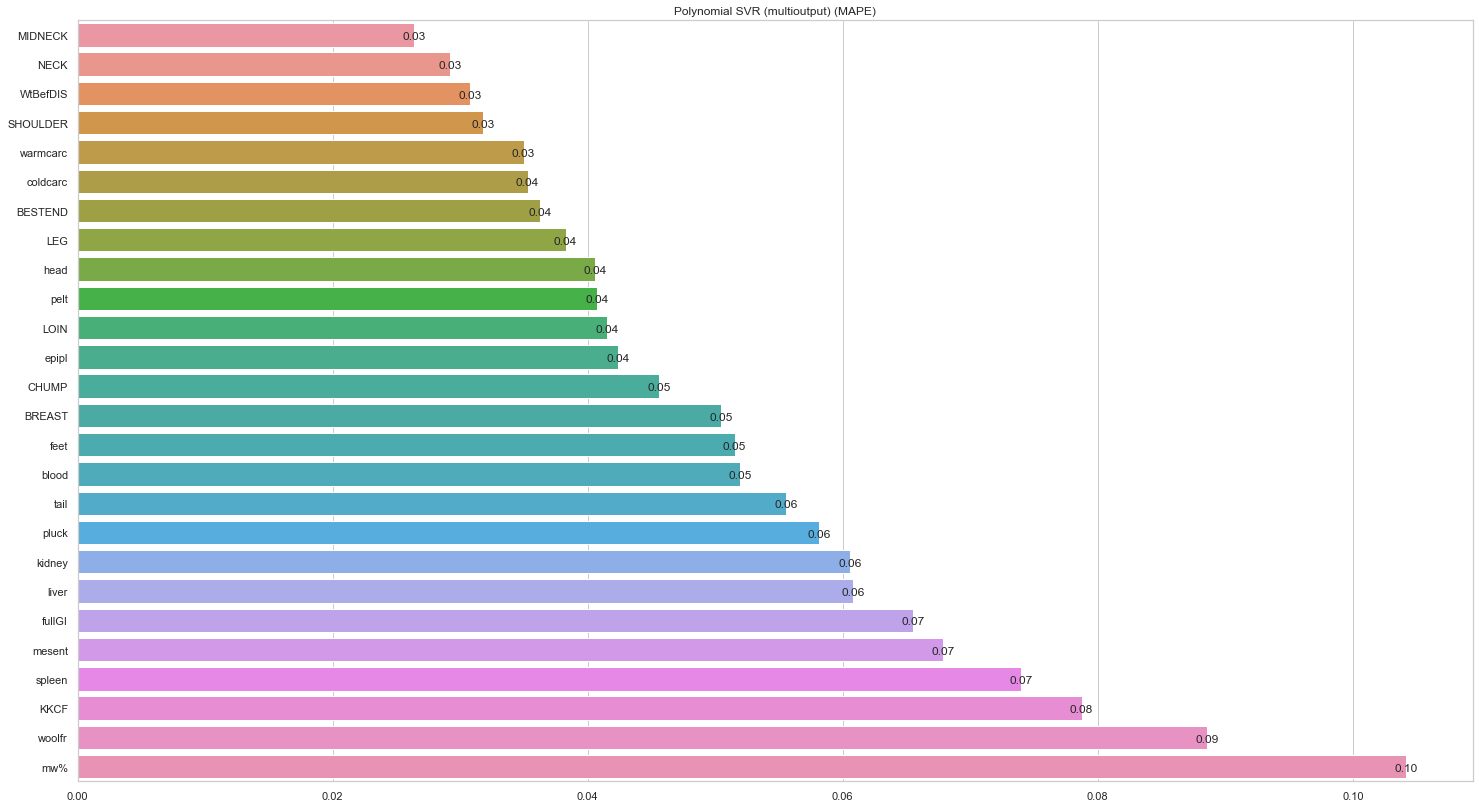

XGBoost (multioutput)
R2 score: 0.8480669255253778
MAE: 0.05314453803149569
RMSE: 0.07064912149920702
MAPE: 0.03902063949427291



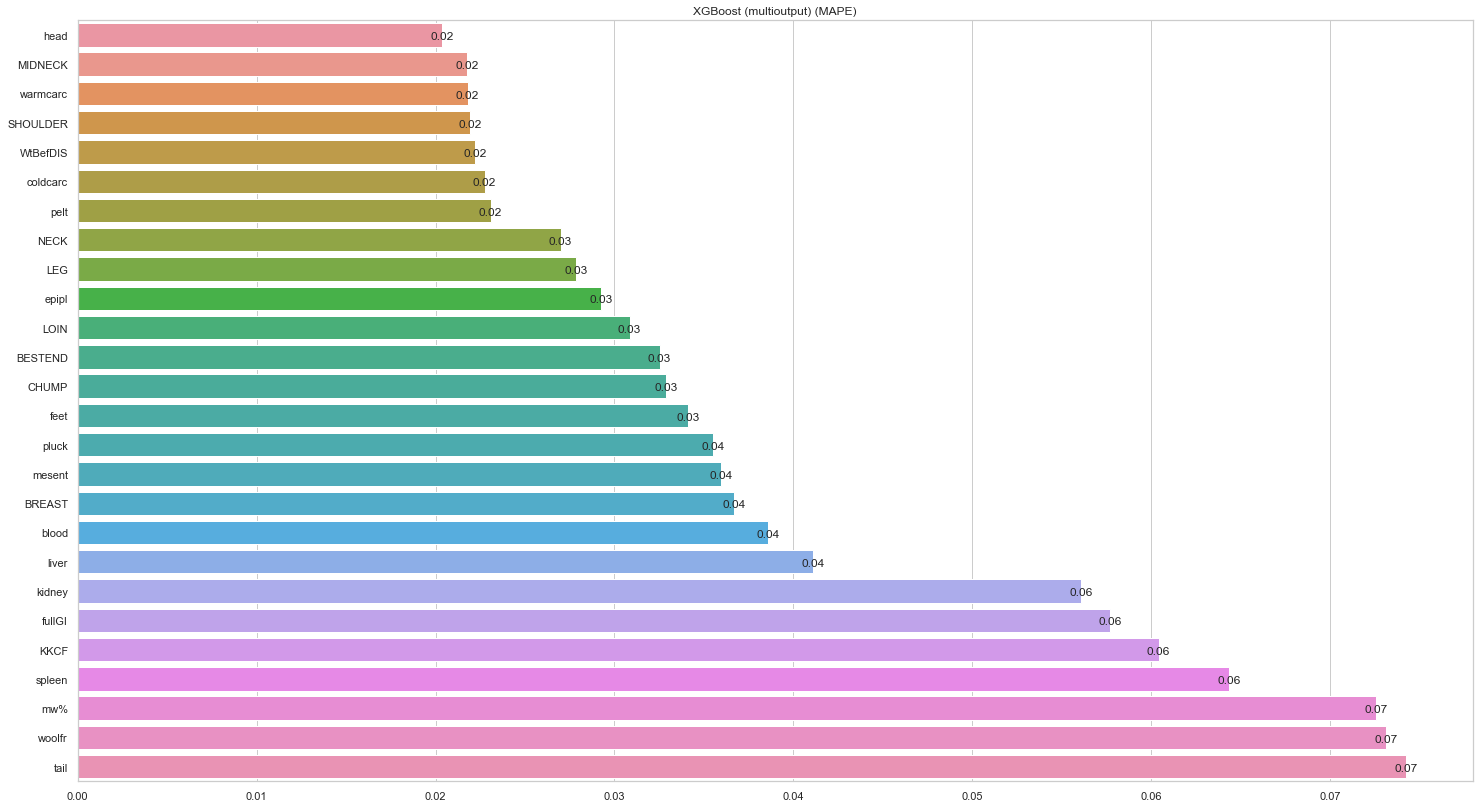

In [6]:
# Separate labels and split to train, test sets
X, y = scale_split_labels(data, scaling='min-max')
X_train, X_test, y_train, y_test = split_train_test(X, y)

run_regressors()